We have six surveys comprising a total of 54 questions and each of these questions has a set of responses from individual users. We'll start by gathering data about the users themselves (from the questions asked at the beginning of each survey), and then generating intended results (relation between success rate in identifying transits and signal-to-noise ratio) for three subgroups. These are experts (users who identified as proficient in astronomy and data analysis), non-experts (users who identified as not proficient in both these fields) and partial + non-experts (this non-expert group combined with users who identified as proficient in just one of these fields).

[Table of contents goes here]

Reach me at b9058149@ncl.ac.uk

# Preamble

Start by importing the relevant modules, and formatting the notebook as desired. Then, create a client with Google to import the data straight from Forms, i.e. six spreadsheets containing the responses. A tutorial/worked example for this is available at https://sempioneer.com/python-for-seo/google-sheets-with-python/. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import gspread
from IPython.display import display
import time
import matplotlib.pyplot as plt
import playsound
from datetime import datetime
from datetime import timedelta
from datetime import date
import random

# Worked example for using Python with Google Sheets available at

gc = gspread.service_account(filename=r'C:\Users\jackt\OneDrive - Newcastle University\Project - summer\Git repository\client_secret.json')

import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import dataframe_image as dfi 
from oauth2client.service_account import ServiceAccountCredentials

# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)

names = ['Survey 1 (Responses)', # List of strings, the names of the excel files containing the responses to each survey.
'Survey 2 (Responses)',
'Survey 3 (Responses)',
'Survey 4 (Responses)',
'Survey 5 (Responses)',
'Survey 6 (Responses)']

import matplotlib
import matplotlib.ticker as ticker
plt.style.use('default')

matplotlib.rcParams.update({'font.size': 18})

# Extracting and organizing data from the Google server

Now, we'll build a pandas dataframe from the spreadsheet I used to build the surveys themselves. This will contain all the relevant information for each data set/light curve I used in the testing. 

As we're doing an A/B/C test for sonification, plots and videos, df_sound, df_visual, and df_video are separate dataframes, which will take questions from the master and have them sorted by each data format in the A/B/C test. For each question, there'll be empty cells which later on will take data for the responses given, the SNR, the survey it was in and an error calculation.

In [3]:
print("Opening master spreadsheet")    
sh  = gc.open('Survey builder')
worksheet = sh.sheet1

questions = worksheet.col_values(6)
questions.pop(0)
correct_answers = worksheet.col_values(2)
correct_answers.pop(0)
snr = worksheet.col_values(20)
snr.pop(0)
survey_n = worksheet.col_values(19)
survey_n.pop(0)

df_master = pd.DataFrame({'Questions from master' : [],
                          'Correct value' : [],
                          'SNR' : []})

for i in range(0,54):
    df_master = df_master.append({'Questions from master':questions[i],
                                  'Correct value':correct_answers[i],
                                  'SNR':snr[i]},
                                  ignore_index=True)

display(df_master)

df_sound = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         '# of 0s': [],
                         '# of 1s': [],
                         '# of 2s': [],
                         '# of 3s': [],
                         '# of 4s': [],
                         'KS test result': [],
                         'σ': [],
                         'SNR': [],
                         'Survey': []})
display(df_sound)

df_visual = pd.DataFrame({'Name': [],
                          'Correct n': [],
                          'Number of correct answers': [],
                          'Total responses': [],
                          '# of 0s': [],
                          '# of 1s': [],
                          '# of 2s': [],
                          '# of 3s': [],
                          '# of 4s': [],
                          'KS test result': [],
                          'σ': [],
                          'SNR': [],
                          'Survey': []})
display(df_visual)

df_video = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         '# of 0s': [],
                         '# of 1s': [],
                         '# of 2s': [],
                         '# of 3s': [],
                         '# of 4s': [],
                         'KS test result': [],
                         'σ': [],
                         'SNR': [],
                         'Survey': []})
display(df_video)

Opening master spreadsheet


,Questions from master,Correct value,SNR
0,Here is the link to sonification 91: https://d...,1,3
1,Here is the link to video 110: https://drive.g...,0,3
2,Here is the link to plot 111: https://drive.go...,0,10
3,Here is the link to plot 71: https://drive.goo...,2,100
4,Here is the link to sonification 174: https://...,0,100
5,Here is the link to sonification 49: https://d...,2,5
6,Here is the link to plot 91: https://drive.goo...,1,3
7,Here is the link to sonification 10: https://d...,1,30
8,Here is the link to sonification 64: https://d...,1,10
9,Here is the link to video 49: https://drive.go...,2,5


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey


Now we've extracted a list of all the questions used and the number of transits and SNR, we're ready to sort these into the three databases from the master dataframe. The 'sorting_hat' function will iterate over the number of questions in the master dataframe (54), and iterates a search in each for sonification, video or plot (probably not the most efficient way of doing this, suggestions welcome). Once it finds the relevant substring in a question in the master, it extracts that questions signal-to-noise, the survey it was in, its name and the correct number of transits (in order to calculate a success rate for each question) and sorts this into the substring's corresponding dataframe.

There's also a quick confirmation that the all the data from the master database has been sorted into tables by format, i.e. the final output should read 18, 18, 18. If this isn't the case, it's likely the data has been sorted from the master database more than once, so re-run the cell above this one to rebuild the databases for each format, and then try again.

In [4]:
substringsoni = "sonification"
substringvid = "video"
substringplot = "plot"

substrings_array = [substringsoni,substringvid,substringplot]

def sorting_hat(i, substring): ## Call this over range of i, over each substring to sort all the data
    
    query = df_master['Questions from master'] 
    
    if substring in query[i]: 
        
        #print("I found", substring, "at entry", i,"in database")
        
        if substring == "sonification":
            
            global df_sound
            
            df_sound = df_sound.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        '# of 0s': '',
                                        '# of 1s': '',
                                        '# of 2s': '',
                                        '# of 3s': '',
                                        '# of 4s': '',
                                        'σ': '',
                                        'SNR':snr[i],
                                        'Survey':survey_n[i]},ignore_index=True)
            
        elif substring == "plot":
            
            global df_visual
            
            df_visual = df_visual.append({'Name':query[i],
                                          'Correct n':correct_answers[i],
                                          'Number of correct answers': '',
                                          'Total responses': '',
                                          '# of 0s': '',
                                          '# of 1s': '',
                                          '# of 2s': '',
                                          '# of 3s': '',
                                          '# of 4s': '',
                                          'σ': '',
                                          'SNR':snr[i],
                                          'Survey':survey_n[i]},ignore_index=True)
            
        else:
        
            global df_video
            
            df_video = df_video.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        '# of 0s': '',
                                        '# of 1s': '',
                                        '# of 2s': '',
                                        '# of 3s': '',
                                        '# of 4s': '',
                                        'σ': '',
                                        'SNR':snr[i],
                                        'Survey':survey_n[i]},ignore_index=True)

for i in range(0,len(df_master['Questions from master'])):
    
    for x in substrings_array:    
        
        sorting_hat(i,x)
    
display(df_sound,df_visual,df_video)

print("Sanity check",len(df_sound['Name']),len(df_visual['Name']),len(df_video['Name'])) 

,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to sonification 91: https://d...,1,,,,,,,,NaN,,3,1
1,Here is the link to sonification 174: https://...,0,,,,,,,,NaN,,100,1
2,Here is the link to sonification 49: https://d...,2,,,,,,,,NaN,,5,1
3,Here is the link to sonification 10: https://d...,1,,,,,,,,NaN,,30,1
4,Here is the link to sonification 64: https://d...,1,,,,,,,,NaN,,10,1
5,Here is the link to sonification 168: https://...,0,,,,,,,,NaN,,30,2
6,Here is the link to sonification 36: https://d...,2,,,,,,,,NaN,,30,2
7,Here is the link to sonification 17: https://d...,1,,,,,,,,NaN,,5,2
8,Here is the link to sonification 111: https://...,0,,,,,,,,NaN,,10,3
9,Here is the link to sonification 71: https://d...,2,,,,,,,,NaN,,100,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to plot 111: https://drive.go...,0,,,,,,,,NaN,,10,1
1,Here is the link to plot 71: https://drive.goo...,2,,,,,,,,NaN,,100,1
2,Here is the link to plot 91: https://drive.goo...,1,,,,,,,,NaN,,3,1
3,Here is the link to plot 161: https://drive.go...,0,,,,,,,,NaN,,7,2
4,Here is the link to plot 28: https://drive.goo...,1,,,,,,,,NaN,,7,2
5,Here is the link to plot 49: https://drive.goo...,2,,,,,,,,NaN,,5,2
6,Here is the link to plot 110: https://drive.go...,0,,,,,,,,NaN,,3,2
7,Here is the link to plot 15: https://drive.goo...,2,,,,,,,,NaN,,7,2
8,Here is the link to plot 64: https://drive.goo...,1,,,,,,,,NaN,,10,3
9,Here is the link to plot 17: https://drive.goo...,1,,,,,,,,NaN,,5,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to video 110: https://drive.g...,0,,,,,,,,NaN,,3,1
1,Here is the link to video 49: https://drive.go...,2,,,,,,,,NaN,,5,2
2,Here is the link to video 91: https://drive.go...,1,,,,,,,,NaN,,3,3
3,Here is the link to video 64: https://drive.go...,1,,,,,,,,NaN,,10,3
4,Here is the link to video 15: https://drive.go...,2,,,,,,,,NaN,,7,3
5,Here is the link to video 28: https://drive.go...,1,,,,,,,,NaN,,7,3
6,Here is the link to video 18: https://drive.go...,2,,,,,,,,NaN,,3,4
7,Here is the link to video 36: https://drive.go...,2,,,,,,,,NaN,,30,4
8,Here is the link to video 59: https://drive.go...,1,,,,,,,,NaN,,100,4
9,Here is the link to video 174: https://drive.g...,0,,,,,,,,NaN,,100,4


Sanity check 18 18 18


# Importing demographics data

Four questions were asked at the beginning of each survey regarding user's academic backgrounds and whether they had a visual impairment. Again we'll define a function 'weighting_function' that we can call over each survey that will extract this data from the responses spreadsheet. We'll also create a dataframe ('weighting_matrix') that contains all the answers given to these four questions which will be useful down the line. These two were referred to as 'weighting' as there were originally plans to weight responses to transit questions based on the user's proficiencies in certain fields.

At this point, I also calculate the number of users by doing a quick len on the number of responses given, and the number of users per survey.

In [5]:
n_users = []

weighting_matrix = pd.DataFrame({'Astronomy proficiency/4' : [],
                                 'Data analysis proficiency/4' : [],
                                 'Music proficiency/4' : [],
                                 'Visual impairment Y/N' : []})

total = len(weighting_matrix)

def weighting_function(survey_sheet):

    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    astro = worksheet.col_values(2)
    astro.pop(0)

    data = worksheet.col_values(3)
    data.pop(0)
    
    music = worksheet.col_values(4)
    music.pop(0)
    
    yn = worksheet.col_values(5)
    yn.pop(0)
    
    n_users.append(len(astro))
    
    for i in range(0,len(astro)):
        
        global weighting_matrix
            
        weighting_matrix = weighting_matrix.append({'Astronomy proficiency/4' : astro[i],
                                             'Data analysis proficiency/4' : data[i],
                                             'Music proficiency/4' : music[i],
                                             'Visual impairment Y/N' : yn[i]},
                                             ignore_index=True)
                
for x in names:

    weighting_function(x)

display(weighting_matrix)
print(len(weighting_matrix['Astronomy proficiency/4']),
      "responses")
print("Number of respondents per survey",n_users)
print("Sanity check...", sum(n_users))

#del dict

,Astronomy proficiency/4,Data analysis proficiency/4,Music proficiency/4,Visual impairment Y/N
0,4,4,1,No
1,4,4,1,No
2,4,4,2,No
3,4,4,4,No
4,1,2,1,No
5,4,4,1,No
6,4,4,1,No
7,4,4,2,No
8,4,4,1,No
9,3,4,2,No


203 responses
Number of respondents per survey [40, 35, 29, 39, 29, 31]
Sanity check... 203


# Producing figures for demographics data

We can now create figures detailing the backgrounds of our users.

## Survey responses and basic demographics bar plots

First is a simple bar plot of the number of responses to each survey. 

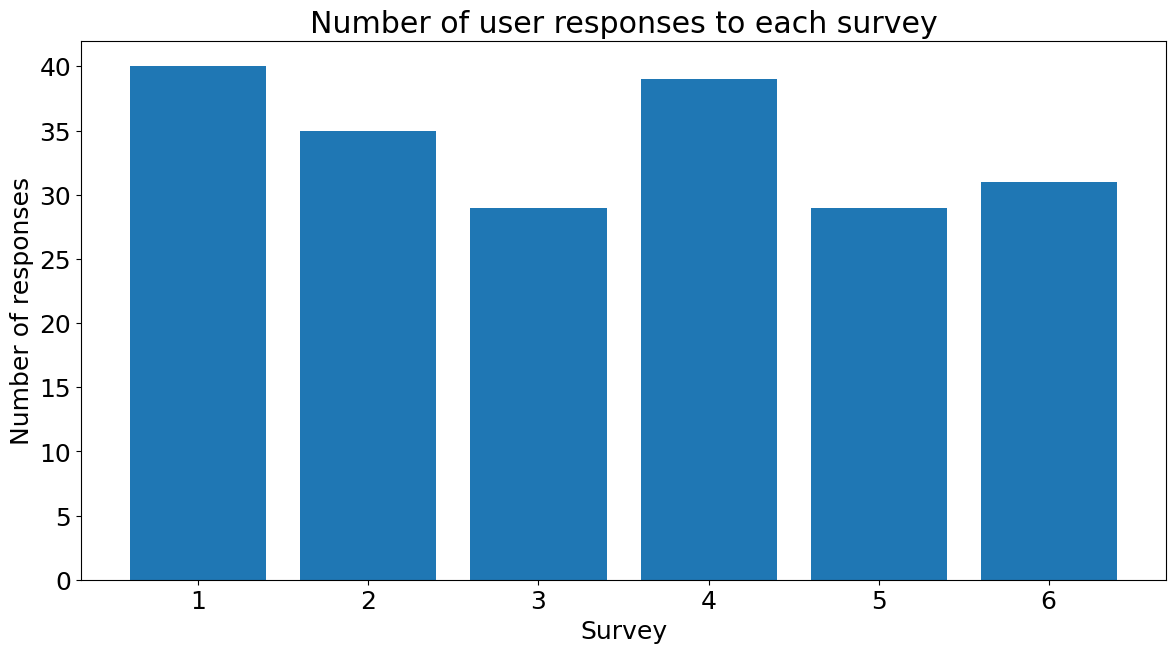

In [6]:
f, ax = plt.subplots(figsize=(14,7))
plt.bar([1,2,3,4,5,6],n_users,width=0.8)
plt.xlabel("Survey")
plt.ylabel("Number of responses")
plt.title("Number of user responses to each survey")
plt.savefig("New report/Produced figures/Number of responses to each survey.jpg")

Secondly, we'll create some figures showing distribution of users over each demographic question. There's also a print out showing the values and a count of users who identified as BVI.

11 users identified as having visual impairment

4    127
1     58
3     10
2      8
Name: Astronomy proficiency/4, dtype: int64

4    162
2     17
1     12
3     12
Name: Data analysis proficiency/4, dtype: int64

1    101
2     63
3     22
4     17
Name: Music proficiency/4, dtype: int64


Text(0, 0.5, 'Number of users')

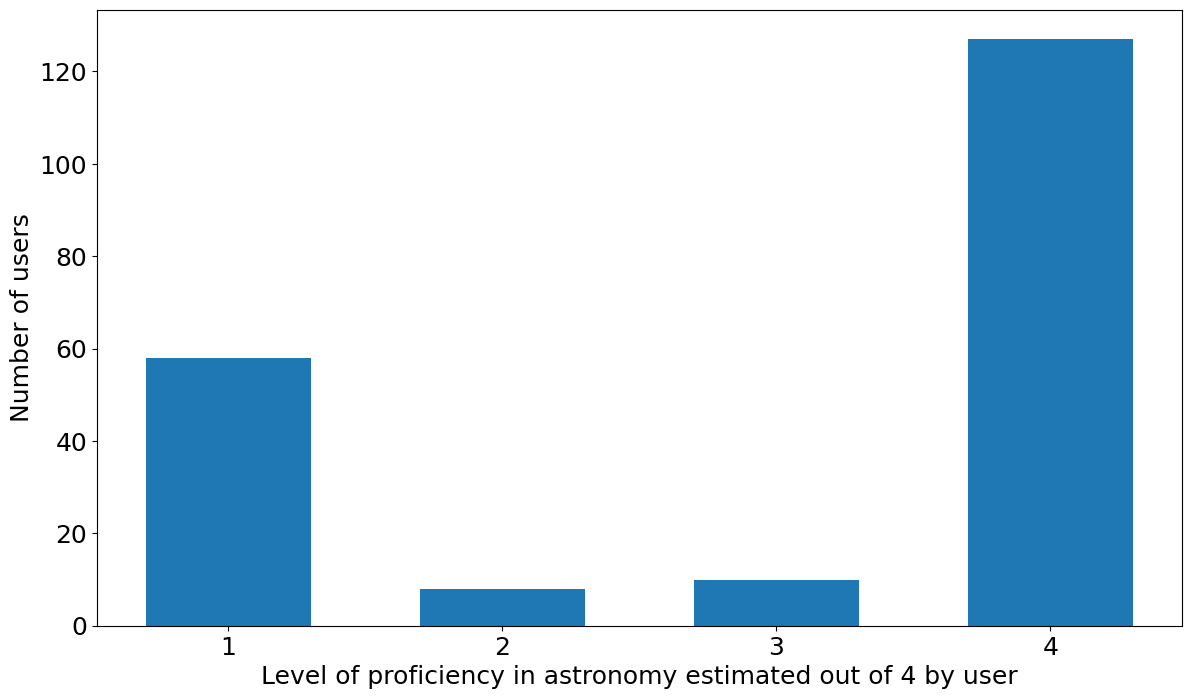

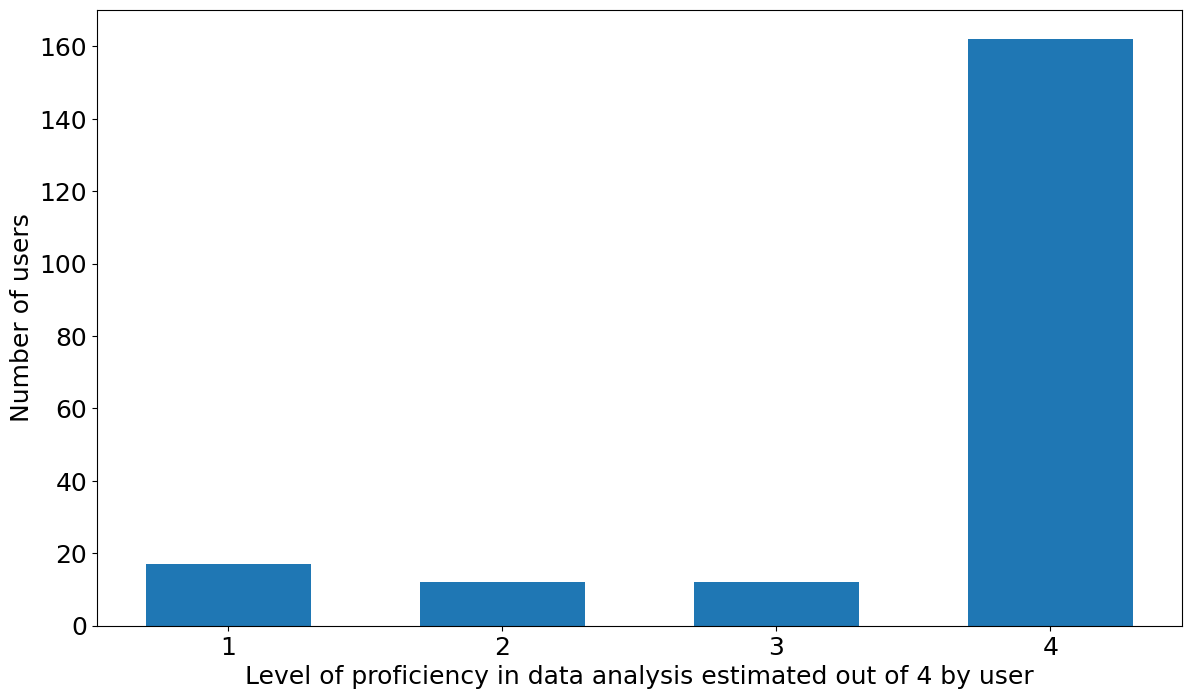

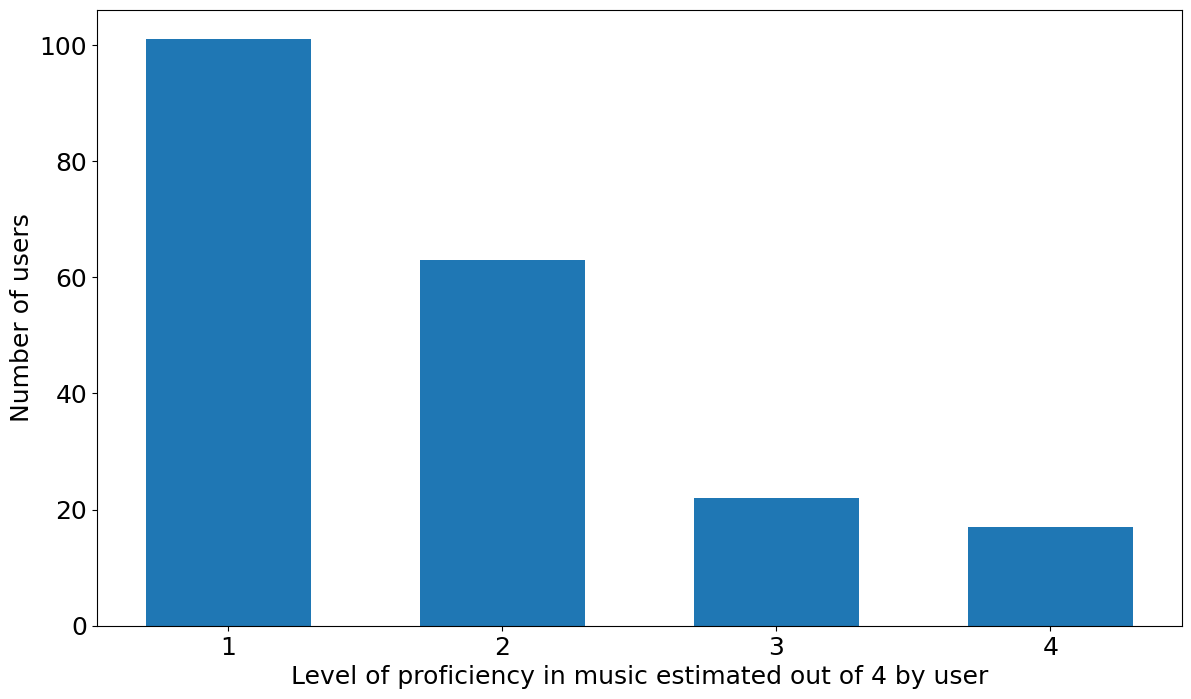

In [7]:
impair = weighting_matrix['Visual impairment Y/N'].value_counts(sort=True, ascending=True)
print(impair[0],"users identified as having visual impairment")
print()
#----------------------------------------------------------------------------------------------------
astroprof = weighting_matrix['Astronomy proficiency/4'].value_counts(normalize=False)
print(astroprof)
print()
astroprof_x = np.linspace(1,4,4)
astroprof_y = [astroprof[1],astroprof[3],astroprof[2],astroprof[0]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(astroprof_x,astroprof_y,width=0.6)
plt.xticks([1,2,3,4])
#plt.plot(astroprof_x,astroprof_y,'b.')
plt.xlabel("Level of proficiency in astronomy estimated out of 4 by user")
plt.ylabel("Number of users")

#----------------------------------------------------------------------------------------------------
dataprof = weighting_matrix['Data analysis proficiency/4'].value_counts(normalize=False)
print(dataprof)
print()
dataprof_x = np.linspace(1,4,4)
dataprof_y = [dataprof[1],dataprof[2],dataprof[3],dataprof[0]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(dataprof_x,dataprof_y,width=0.6)
plt.xticks([1,2,3,4])
plt.xlabel("Level of proficiency in data analysis estimated out of 4 by user")
plt.ylabel("Number of users")

#----------------------------------------------------------------------------------------------------
musicprof = weighting_matrix['Music proficiency/4'].value_counts(normalize=False)
print(musicprof)
musicprof_x = np.linspace(1,4,4)
musicprof_y = [musicprof[0],musicprof[1],musicprof[2],musicprof[3]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(musicprof_x,musicprof_y,width=0.6)
plt.xticks([1,2,3,4])
plt.xlabel("Level of proficiency in music estimated out of 4 by user")
plt.ylabel("Number of users")

## Combined plots

Next, a combined figure, essentially the three plots above together.

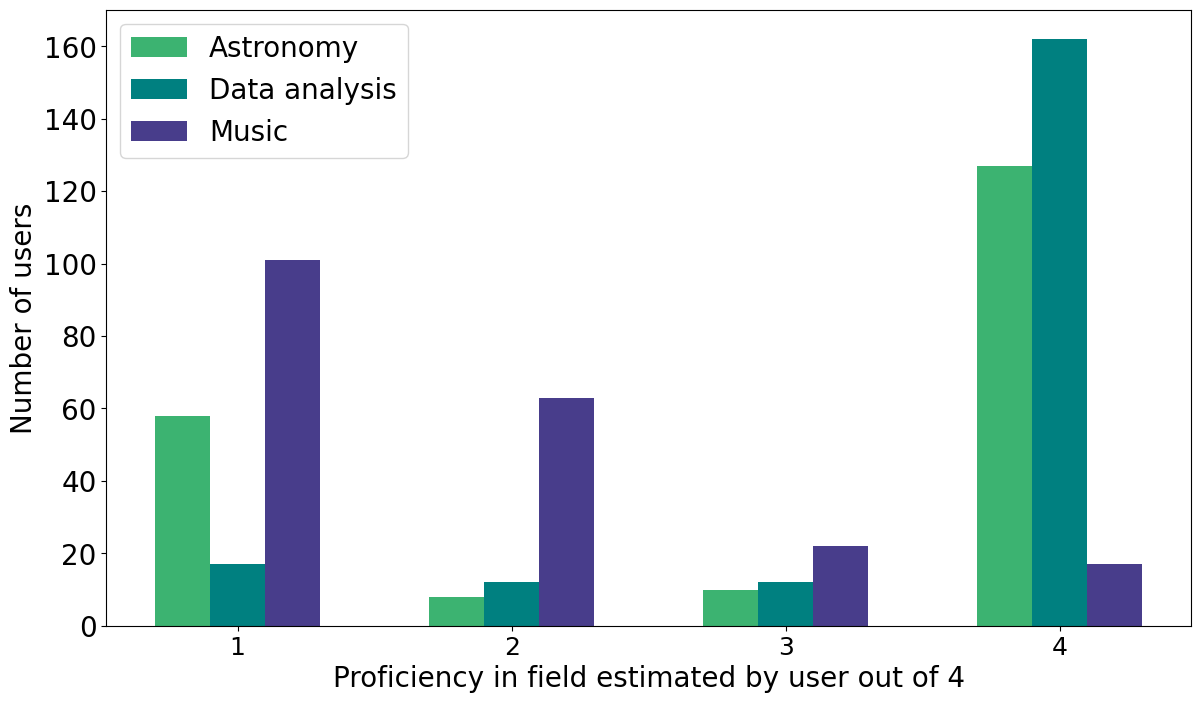

In [8]:
matplotlib.rcParams.update({'font.size': 20})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar(astroprof_x-0.2, astroprof_y, width=0.2, color='mediumseagreen', align='center',label='Astronomy')
ax.bar(dataprof_x, dataprof_y, width=0.2, color='teal', align='center',label='Data analysis')
ax.bar(musicprof_x+0.2, musicprof_y, width=0.2, color='darkslateblue', align='center',label='Music')
ax.set_xlabel("Proficiency in field estimated by user out of 4")
ax.set_ylabel("Number of users")
ax.legend(loc='best')

plt.xticks([1,2,3,4],fontsize=18)
#plt.gcf()
plt.savefig("New report/Produced figures/Combined bar chart of demographics.jpg")

Demographics figure without the music data as this wasn't used. 

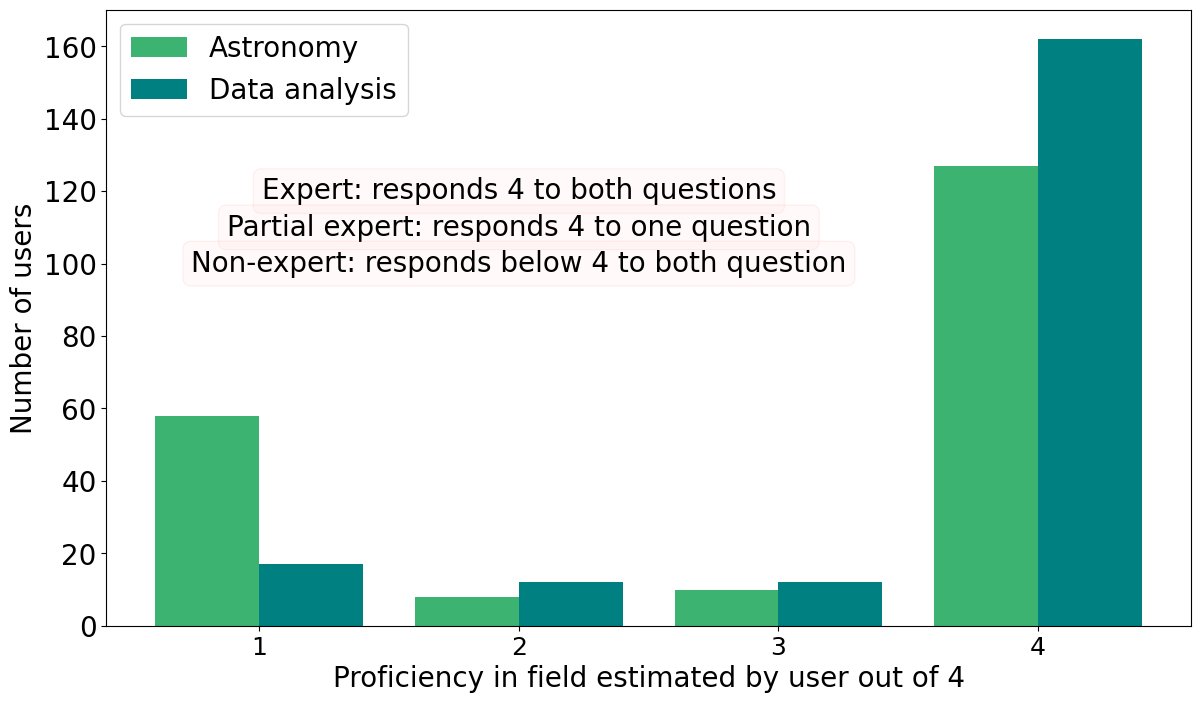

In [9]:
matplotlib.rcParams.update({'font.size': 20})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar(astroprof_x-0.2, astroprof_y, width=0.4, color='mediumseagreen', align='center',label='Astronomy')
ax.bar(dataprof_x+0.2, dataprof_y, width=0.4, color='teal', align='center',label='Data analysis')
ax.set_xlabel("Proficiency in field estimated by user out of 4")
ax.set_ylabel("Number of users")
ax.legend(loc='best')

matplotlib.rcParams.update({'font.size': 14})
plt.text(2, 120, "Expert: responds 4 to both questions", color='black', size=20,
         ha="center", va="center",
         bbox=dict(facecolor='none', edgecolor='green',
                   boxstyle="round", alpha=0.1,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.text(2, 110, "Partial expert: responds 4 to one question", color='black', size=20,
         ha="center", va="center",
         bbox=dict(facecolor='white', edgecolor='green',
                   boxstyle="round", alpha=0.1,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(2, 100, "Non-expert: responds below 4 to both question", color='black', size=20,
         ha="center", va="center",
         bbox=dict(facecolor='white', edgecolor='green',
                   boxstyle="round", alpha=0.1,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.xticks([1,2,3,4],fontsize=18)
#plt.gcf()
plt.savefig("New report/Produced figures/2Combined bar chart of demographics.jpg")

d = {'Estimated proficiency': [1,2,3,4], 'Astronomy': astroprof_y, 'Data analysis': dataprof_y}
df = pd.DataFrame(data=d)
f = open("demographics.tex", "w")
f.write(df.to_latex(index=False))
f.close()

We can see from this figure and the three previous plots that the large majority of users put 4/4 for their responses to the data analysis and astronomy questions. Therefore, I'm going to consider 4/4 as an expert and anything less as not an expert. This will give us the strongest statistical result while maximizing size of the data set. 

Now, we'll convert the 'weighting matrix' so that the numerical responses to these first two demographics questions are converted to simple Y/N responses (i.e. the question being 'would you consider yourself an expert in this field'; 4/4 = expert, 3/4, 2/4 or 1/4 = non-expert.).

The next cell produces two figures: a table showing the number of users for each possible response, and the groupings of users for the astronomy and data analysis expertise questions, and saves these to the system.

In [10]:
bvi = [] # This is a list of indices of BVI users, which we're going to remove as the numbers are too small.
for i in range(0,len(weighting_matrix)):
    if weighting_matrix.loc[i,'Visual impairment Y/N'] == 'Yes':
        bvi.append(i)
    
responses = pd.DataFrame({'Astro expert Y': [],
                          'Data expert Y': [],
                          'Music proficiency/4': []})

astro = []
data = []
music = []

def convertyn():

    global responses
    global astro
    global data
    global music
    
    astro_resp = weighting_matrix["Astronomy proficiency/4"].tolist()

    astro_respint = []
    astro = []
    
    for sublist in astro_resp:
        for item in sublist:
            if item == '':
                astro_respint.append(0)#astro_resp.remove(sublist)
            else:
                astro_respint.append(int(item))
    for i in astro_respint:
        if i == 4:
            astro.append('Y')
        else:
            astro.append('N')

    data_resp = weighting_matrix["Data analysis proficiency/4"].tolist()

    data_respint = []
    data = []
    
    for sublist in data_resp:
        for item in sublist:
            if item == '':
                data_resp.remove(sublist)
            else:
                data_respint.append(int(item))
    for i in data_respint:
        if i == 4:
            data.append('Y')
        else:
            data.append('N')

    music_resp = weighting_matrix["Music proficiency/4"].tolist()

    music_respint = []
    music = []
    
    for sublist in music_resp:
        for item in sublist:
            if item == '':
                music_respint.append(0)
            else:
                music_respint.append(int(item))
    music = music_respint
            
    print(len(music),len(astro),len(data))
            
    for i in range(0,len(astro)):
        
        if astro[i] == 'Y':
            responses.loc[i, 'Astro expert Y'] = True
        
        else:
            responses.loc[i, 'Astro expert Y'] = False
            
        if data[i] == 'Y':
            responses.loc[i, 'Data expert Y'] = True
            
        else:
            responses.loc[i, 'Data expert Y'] = False
            
        responses.at[i,'Music proficiency/4'] = music[i] # Dropping any responses that weren't given as a number 1-4 

convertyn()
display(responses)

values = responses.value_counts(sort=False).to_frame()
dfi.export(values,'New report/Produced figures/values.png')

responses_drop = responses.drop(columns=['Music proficiency/4'])
values_drop = responses_drop.value_counts(sort=True).to_frame()
dfi.export(values_drop,'New report/Produced figures/values_drop.png')

display(values,values_drop) 

203 203 203


,Astro expert Y,Data expert Y,Music proficiency/4
0,True,True,1.0
1,True,True,1.0
2,True,True,2.0
3,True,True,4.0
4,False,False,1.0
5,True,True,1.0
6,True,True,1.0
7,True,True,2.0
8,True,True,1.0
9,False,True,2.0


0
Astro expert Y Data expert Y Music proficiency/4    
False          False         1.0                  16
                             2.0                  13
                             3.0                   3
                             4.0                   8
               True          1.0                  18
                             2.0                  18
True           False         1.0                   1
               True          1.0                  66
                             2.0                  32
                             3.0                  19
                             4.0                   9

0
Astro expert Y Data expert Y     
True           True           126
False          False           40
               True            36
True           False            1

# Setting up for data analysis

## Separating our subgroups

Here, we'll take the table of responses and note importantly that an index/entry in this table corresponds to a user. We can thus generate duplicates of this table, and filter out some users so we have tables of users corresponding to the subgroups we want to investigate.

nexpert and pexpert correspond to non-experts and partial + non-experts respectively. partials is a list of the actual partial experts/experts in one field.

In [11]:
global responses
global weighting_matrix

expert = responses # Create three duplicates of the matrix of responses - for experts, partial experts, amateurs.
nexpert = responses
pexpert = responses

expert = expert[expert['Astro expert Y'] != False]
expert = expert[expert['Data expert Y'] != False]

expert_indices = expert.index
#print(expert_indices)

pexpert = pexpert.drop(pexpert.index[expert_indices]) # This is actually partial experts + non-experts collated
#display(pexpert)

nexpert = nexpert[nexpert['Astro expert Y'] != True] # Just responses for not experts in either category (smaller dataset)
nexpert = nexpert[nexpert['Data expert Y'] != True]


partials = []
for i in range(0,len(pexpert)):
    if pexpert.index[i] not in nexpert.index:
        partials.append(pexpert.index[i])
        
#print(partials,len(partials))

#display(expert,nexpert)
print("Number of expert responses",len(expert), ": Number of partial experts responses",len(pexpert), ": Number of non-experts responses",len(nexpert))

Number of expert responses 126 : Number of partial experts responses 77 : Number of non-experts responses 40


## Setting up for matching responses to questions

### Prep

Create duplicates of df_sound, df_visual and df_video that will contain response data for each subgroup.

In [12]:
expert_sound = df_sound.copy(deep=True)
expert_visual = df_visual.copy(deep=True)
expert_video = df_video.copy(deep=True)

nexpert_sound = df_sound.copy(deep=True)
nexpert_visual = df_visual.copy(deep=True)
nexpert_video = df_video.copy(deep=True)

pexpert_sound = df_sound.copy(deep=True)
pexpert_visual = df_visual.copy(deep=True)
pexpert_video = df_video.copy(deep=True)

Define a function that sorts response data into the correct format database. 

In [13]:
def sorting_hat_success(sound,visual,video,query,success,responses,err,n0,n1,n2,n3,n4):

    if "sonification" in query: # question contains substring
        
        col = sound['Name']
    
        for i in range(0,len(col)):
            
            cell = sound.iloc[i]['Name']
            
            if query in cell:
                
                sound.at[i,'Number of correct answers'] = sound.at[i,'Number of correct answers'].replace('',str(success))
                sound.at[i,'Total responses'] = sound.at[i,'Total responses'].replace('',str(responses))
                sound.at[i,'# of 0s'] = sound.at[i,'# of 0s'].replace('',str(n0))
                sound.at[i,'# of 1s'] = sound.at[i,'# of 1s'].replace('',str(n1))
                sound.at[i,'# of 2s'] = sound.at[i,'# of 2s'].replace('',str(n2))
                sound.at[i,'# of 3s'] = sound.at[i,'# of 3s'].replace('',str(n3))
                sound.at[i,'# of 4s'] = sound.at[i,'# of 4s'].replace('',str(n4))
                sound.at[i,'σ'] = sound.at[i,'σ'].replace('',str(err))
                
    elif "plot" in query:

        col = visual['Name']
    
        for i in range(0,len(col)):
            
            cell = visual.iloc[i]['Name']
            
            if query in cell:
                
                visual.at[i,'Number of correct answers'] = visual.at[i,'Number of correct answers'].replace('',str(success))
                visual.at[i,'Total responses'] = visual.at[i,'Total responses'].replace('',str(responses))
                visual.at[i,'# of 0s'] = visual.at[i,'# of 0s'].replace('',str(n0))
                visual.at[i,'# of 1s'] = visual.at[i,'# of 1s'].replace('',str(n1))
                visual.at[i,'# of 2s'] = visual.at[i,'# of 2s'].replace('',str(n2))
                visual.at[i,'# of 3s'] = visual.at[i,'# of 3s'].replace('',str(n3))
                visual.at[i,'# of 4s'] = visual.at[i,'# of 4s'].replace('',str(n4))
                visual.at[i,'σ'] = visual.at[i,'σ'].replace('',str(err))
                
    else:

        col = video['Name']
    
        for i in range(0,len(col)):
            
            cell = video.iloc[i]['Name']
            
            if query in cell:
                
                video.at[i,'Number of correct answers'] = video.at[i,'Number of correct answers'].replace('',str(success))
                video.at[i,'Total responses'] = video.at[i,'Total responses'].replace('',str(responses))
                video.at[i,'# of 0s'] = video.at[i,'# of 0s'].replace('',str(n0))
                video.at[i,'# of 1s'] = video.at[i,'# of 1s'].replace('',str(n1))
                video.at[i,'# of 2s'] = video.at[i,'# of 2s'].replace('',str(n2))
                video.at[i,'# of 3s'] = video.at[i,'# of 3s'].replace('',str(n3))
                video.at[i,'# of 4s'] = video.at[i,'# of 4s'].replace('',str(n4))
                video.at[i,'σ'] = video.at[i,'σ'].replace('',str(err))

The 'search_function' is what takes the actual data in the spreadsheet, and sorts it into these databases defined earlier. 

In [14]:
def search_function(survey_sheet,output_sound,output_visual,output_video):
    
    sh = gc.open(survey_sheet)
    worksheet = sh.sheet1

    print(survey_sheet,"opened.")
    print("")

    global total_responses_counter
    global to_remove

    success_rates = []
    snr = []

    for i in range(6,15): # iterating over each question in the survey
        
        questioncol = worksheet.col_values(i) # Obtaining the question string for each form.
        #print(questioncol)
        question = questioncol[0]
        responses = questioncol[1:] # Getting the responses given to the question. Take away indices we want to remove from lists in cells above.
        n_users = len(responses)
        #print(n_users)
        
        outs = to_remove_sort()
        responses = condition(survey_sheet,responses,outs)
        
        for j in range(0,len(df_master['Questions from master'])): # Matching up sorted data using sortinghat and appending to databases.

            if df_master.iloc[j]['Questions from master'] == question:
                #print("I found",question,"in the master")
                #print("It's value of snr is",df_master.iloc[j]['snr'])
                #print("The correct answer was",df_master.iloc[j]['correct value'],"transit")
                #print("The responses were",responses)
                
               #np.std(np.array(filter_float(responses)).astype(np.float))#
                
                ks = np.array(filter_float(responses)).astype(np.float)
                #flat = scipy.stats.kstest(ks,'randint',args=(0,4))
                
                bool_list = []

                ## Search across the three databases for the relevant string, then once found
                ## search for the relevant snr. 

                for k in responses: ## Success rate calculation here
                
                        test = list(map(lambda x, y: x == y, df_master.iloc[j]['Correct value'], k))
                        bool_list = bool_list + test

                #print(bool_list)

                true_count = sum(bool_list)
                sigma = np.sqrt(true_count)/len(responses)
                #print("got a true count of ",true_count)
                #print("got",len(responses),"responses")
                #perc = true_count/len(bool_list)*100.0

                sorting_hat_success(output_sound,output_visual,output_video,
                                    question,true_count,
                                    len(responses),sigma,
                                    #flat[0],flat[1],
                                    responses.count('0'),responses.count('1'),
                                    responses.count('2'),responses.count('3'),
                                    responses.count('4'))

            else:
                continue

As we have six different surveys, and the search function works by searching for indices (user's responses), we need to make sure the right indices are being removed from each survey. If we want to remove the responses corresponding to [1,50,160] in the responses table, and feed this to search_function, no survey has 160 responses so this index won't get removed. Therefore this needs to be more like [1] from Survey 1, [14] from Survey 3, etc. 

to_remove_sort will sort a list of indexes into six lists of indices to remove from each survey.

In [15]:
def to_remove_sort():

    #to_remove = []

    n1remove = [] 
    n2remove = []
    n3remove = []
    n4remove = []
    n5remove = []
    n6remove = []
    
    for x in to_remove:
        if -1 < x <= n_users[0]-1:
            n1remove.append(x)

        elif n_users[0] <= x <= n_users[1]+n_users[0]-1:
            n2remove.append(x - n_users[0])

        elif n_users[1]+n_users[0] <= x <= n_users[1]+n_users[0]+n_users[2]-1:
            n3remove.append(x - (n_users[1]+n_users[0]))

        elif n_users[1]+n_users[0]+n_users[2] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]-1:
            n4remove.append(x-(n_users[1]+n_users[0]+n_users[2]))

        elif n_users[1]+n_users[0]+n_users[2]+n_users[3] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]-1:
            n5remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]))

        else:
            n6remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]))
            
    return n1remove, n2remove, n3remove, n4remove, n5remove, n6remove

Quick filter that removes blank responses or responses that were 'N/A unable to analyze visually' corresponding to BVI responses.

In [16]:
def filter_float(arr):
    
    output = []
    
    for i in arr:
        
        if len(i) == 0:
            arr.remove(i)
        elif len(i) == 41:
            arr.remove(i)
        else:
            output.append(i)
            
    return output

Turns a column of responses into a list and removes the indices we want gone. 

In [17]:
def condition(name_string,arr,remove_obj):
    
    if '1' in name_string:
        
        temp_1 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[0]:
            temp_1 = temp_1[temp_1.index != x]
            
        out = temp_1['Response'].tolist()
        return out
    
    elif '2' in name_string:
        
        temp_2 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[1]:
            temp_2 = temp_2[temp_2.index != x]
            
        out = temp_2['Response'].tolist()
        return out
    
    elif '3' in name_string:
        
        temp_3 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[2]:
            temp_3 = temp_3[temp_3.index != x]
            
        out = temp_3['Response'].tolist()
        return out
        
    elif '4' in name_string:
        
        temp_4 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[3]:
            temp_4 = temp_4[temp_4.index != x]
            
        out = temp_4['Response'].tolist()
        return out
        
    elif '5' in name_string:
        
        temp_5 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[4]:
            temp_5 = temp_5[temp_5.index != x]
            
        out = temp_5['Response'].tolist()
        return out
        
    else:
        
        temp_6 = pd.DataFrame({'Response': arr})
        
        for x in remove_obj[5]:
            temp_6 = temp_6[temp_6.index != x]
            
        out = temp_6['Response'].tolist()
        return out

### After the fact

These two functions limit errors so they don't go over 100 or below 0 (success rate is a percentage)

In [18]:
def error_trimming(success,error):
    
    
    if type(success) == float:
        uplim = 0
        lolim = 0
        #print(success[i],",",uplim[i],lolim[i],error[i])

        if success == 100:
            uplim = 0 
            lolim = error

        elif (success + error) > 100:
            uplim = (100 - success)
            lolim = error


        elif (success - error) < 0:
            lolim = success
            uplim = error
        else:
            uplim = error
            lolim = error

        return [[uplim], [lolim]]
    
    else:
        
        uplim = [None]*len(success)
        lolim = [None]*len(success)

        for i in range(0,len(success)):
            #print(success[i],",",uplim[i],lolim[i],error[i])

            if success[i] == 100:
                uplim[i] = 0
                lolim[i] = error[i]

            elif (success[i] + error[i]) > 100:
                uplim[i] = (100 - success[i])
                lolim[i] = error[i]


            elif (success[i] - error[i]) < 0:
                lolim[i] = success[i]
                uplim[i] = error[i]

            else:
                uplim[i] = error[i]
                lolim[i] = error[i]

        return uplim, lolim

def error_out(success,error):

    lo = error_trimming(success,error)[1]
    up = error_trimming(success,error)[0]
    errs = [lo, up]
    return errs

Calculates the proportion of incorrect responses for a given dataframe and signal-to-noise ratio that were either 0, or 1 or 2, for use with the guess percentages. 

In [19]:
def prop0_incorrect(df,snr):

    k = df[df.SNR == str(snr)]
    k = k[k['Correct n'] != '0']
    
    #display(k)
    
    wrong_responses = int(k.iloc[0]['# of 0s']) + int(k.iloc[1]['# of 0s'])
    total_responses = int(k.iloc[0]['Total responses']) + int(k.iloc[1]['Total responses'])
    prop0 = wrong_responses/total_responses
    err = np.sqrt(wrong_responses)/total_responses
    #print(wrong_responses,total_responses,prop0,"err =",err)
    
    return prop0, err

def prop12_incorrect(df,snr):

    k = df[df.SNR == str(snr)]
    k = k[k['Correct n'] != '1']
    k = k[k['Correct n'] != '2'] # Drop all entries where the correct n is 1 or 2
    
    #display(k)
    
    wrong_responses = int(k.iloc[0]['# of 1s']) + int(k.iloc[0]['# of 2s']) # How many incorrect 1s or 2s
    total_responses = int(k.iloc[0]['Total responses']) # How many responses in total
    prop12 = wrong_responses/total_responses
    err = np.sqrt(wrong_responses)/total_responses
    #print(wrong_responses,total_responses,prop12,"err = ",err)
    
    return prop12, err

Uses the above two functions to calculate the guess percentage.

In [20]:
def calc_0guess(sounddata,visualdata,videodata):

    props_sound = []
    props_visual = []
    props_video = []
    
    props_sound_err = []
    props_visual_err = []
    props_video_err = []

    guesses_0_experts = []
    guesses_0_experts_err = [] # Sound, visual, video
    snr = [3,5,7,10,30,100]

    for i in snr:

        props_sound.append(prop0_incorrect(sounddata,i)[0])
        props_visual.append(prop0_incorrect(visualdata,i)[0])
        props_video.append(prop0_incorrect(videodata,i)[0])
        
        props_sound_err.append(prop0_incorrect(sounddata,i)[1])
        props_visual_err.append(prop0_incorrect(visualdata,i)[1])
        props_video_err.append(prop0_incorrect(videodata,i)[1])

    guesses_0_experts.append(100*sum(props_sound)/len(snr))
    guesses_0_experts.append(100*sum(props_visual)/len(snr))
    guesses_0_experts.append(100*sum(props_video)/len(snr))
    
    guesses_0_experts_err.append(100*sum(props_sound_err)/len(snr))
    guesses_0_experts_err.append(100*sum(props_visual_err)/len(snr))
    guesses_0_experts_err.append(100*sum(props_video_err)/len(snr))

    return guesses_0_experts, guesses_0_experts_err

def calc_12guess(sounddata,visualdata,videodata):

    props_sound = []
    props_visual = []
    props_video = []
    
    props_sound_err = []
    props_visual_err = []
    props_video_err = []

    guesses_12_experts = []
    guesses_12_experts_err = [] # Sound, visual, video
    snr = [3,5,7,10,30,100]
        
    for i in snr:

        props_sound.append(prop12_incorrect(sounddata,i)[0])
        props_visual.append(prop12_incorrect(visualdata,i)[0])
        props_video.append(prop12_incorrect(videodata,i)[0])
        
        props_sound_err.append(prop12_incorrect(sounddata,i)[1])
        props_visual_err.append(prop12_incorrect(visualdata,i)[1])
        props_video_err.append(prop12_incorrect(videodata,i)[1])

    guesses_12_experts.append(100*sum(props_sound)/len(snr))
    guesses_12_experts.append(100*sum(props_visual)/len(snr))
    guesses_12_experts.append(100*sum(props_video)/len(snr))
    
    guesses_12_experts_err.append(100*sum(props_sound_err)/len(snr))
    guesses_12_experts_err.append(100*sum(props_visual_err)/len(snr))
    guesses_12_experts_err.append(100*sum(props_video_err)/len(snr))
    
    return guesses_12_experts, guesses_12_experts_err

# Experts

## Accumulating the data

Obtain the responses we don't want, then call the search_function over each survey, remove said responses, and obtain the responses we do want. Then display the three databases corresponding to our subgroups data, and group these three databases into a set.

In [21]:
off = list(pexpert.index.values)
to_remove = []

for i in off:
    to_remove.append(i)
    
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)

print(len(responses)-len(to_remove),"responses")

total_responses_counter = 0

for x in names:
    search_function(x,expert_sound,expert_visual,expert_video)

print("Responses and correct answers calculated")

def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

str_df = [get_df_name(expert_sound),get_df_name(expert_visual),get_df_name(expert_video)]

sets_expert = pd.DataFrame({'Data':[expert_sound,expert_visual,expert_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets_expert['Data']:
    sort(x)
    display(x)

118 responses
Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
8,Here is the link to sonification 111: https://...,0,11,16,11,2,3,0,0,NaN,0.2072890493972125,10,3
14,Here is the link to sonification 161: https://...,0,12,14,12,0,0,2,0,NaN,0.24743582965269675,7,5
10,Here is the link to sonification 123: https://...,0,15,16,15,1,0,0,0,NaN,0.24206145913796356,5,3
5,Here is the link to sonification 168: https://...,0,17,21,17,2,1,0,1,NaN,0.1963383631246505,30,2
17,Here is the link to sonification 110: https://...,0,15,17,15,2,0,0,0,NaN,0.22782254977690689,3,6
1,Here is the link to sonification 174: https://...,0,19,22,19,1,1,0,1,NaN,0.19813177016093972,100,1
3,Here is the link to sonification 10: https://d...,1,20,22,1,20,1,0,0,NaN,0.20327890704543544,30,1
7,Here is the link to sonification 17: https://d...,1,2,22,19,2,0,1,0,NaN,0.0642824346533225,5,2
16,Here is the link to sonification 59: https://d...,1,17,17,0,17,0,0,0,NaN,0.24253562503633297,100,6
12,Here is the link to sonification 28: https://d...,1,8,26,18,8,0,0,0,NaN,0.10878565864408424,7,4


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to plot 111: https://drive.go...,0,18,20,18,1,1,0,0,NaN,0.21213203435596423,10,1
14,Here is the link to plot 174: https://drive.go...,0,13,13,13,0,0,0,0,NaN,0.2773500981126146,100,5
13,Here is the link to plot 123: https://drive.go...,0,14,14,14,0,0,0,0,NaN,0.2672612419124244,5,5
3,Here is the link to plot 161: https://drive.go...,0,19,19,19,0,0,0,0,NaN,0.2294157338705618,7,2
6,Here is the link to plot 110: https://drive.go...,0,19,21,19,2,0,0,0,NaN,0.20756661635907972,3,2
16,Here is the link to plot 168: https://drive.go...,0,15,15,15,0,0,0,0,NaN,0.25819888974716115,30,6
12,Here is the link to plot 59: https://drive.goo...,1,13,14,1,13,0,0,0,NaN,0.25753937681885636,100,5
10,Here is the link to plot 10: https://drive.goo...,1,27,27,0,27,0,0,0,NaN,0.19245008972987526,30,4
9,Here is the link to plot 17: https://drive.goo...,1,0,15,15,0,0,0,0,NaN,0.0,5,3
8,Here is the link to plot 64: https://drive.goo...,1,11,16,2,11,3,0,0,NaN,0.2072890493972125,10,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to video 110: https://drive.g...,0,17,21,17,3,0,0,1,NaN,0.1963383631246505,3,1
15,Here is the link to video 111: https://drive.g...,0,15,16,15,1,0,0,0,NaN,0.24206145913796356,10,6
12,Here is the link to video 168: https://drive.g...,0,12,14,12,1,0,0,1,NaN,0.24743582965269675,30,5
11,Here is the link to video 161: https://drive.g...,0,27,27,27,0,0,0,0,NaN,0.19245008972987526,7,4
10,Here is the link to video 123: https://drive.g...,0,27,27,27,0,0,0,0,NaN,0.19245008972987526,5,4
9,Here is the link to video 174: https://drive.g...,0,25,25,25,0,0,0,0,NaN,0.2,100,4
14,Here is the link to video 10: https://drive.go...,1,16,16,0,16,0,0,0,NaN,0.25,30,6
13,Here is the link to video 17: https://drive.go...,1,0,17,17,0,0,0,0,NaN,0.0,5,6
8,Here is the link to video 59: https://drive.go...,1,27,27,0,27,0,0,0,NaN,0.19245008972987526,100,4
5,Here is the link to video 28: https://drive.go...,1,11,16,4,11,1,0,0,NaN,0.2072890493972125,7,3


## Data analysis for the experts

### Estimating guess percentages

Calculate guess percentages for curves with transits and curves with none.

In [22]:
print(calc_0guess(expert_sound,expert_visual,expert_video),"Guess percentages + errors for non-transit sonifications, plots and videos - experts")
print(calc_12guess(expert_sound,expert_visual,expert_video),"Guess percentages + errors for transit sonifications, plots and videos - experts")

([39.207122242836526, 30.15713255538837, 32.344746661607125], [8.28941503120818, 7.272443472510765, 7.055736829044665]) Guess percentages + errors for non-transit sonifications, plots and videos - experts
([12.106888209829386, 3.2539682539682544, 4.613095238095238], [7.2034054368676985, 2.3009030181467023, 3.6067863552133943]) Guess percentages + errors for transit sonifications, plots and videos - experts


### n = 0 data

Define a function that takes the set and the dataframes as input and produces a figure showing success rates for no-transit curves.

In [28]:
def produce_n0(sets,sound_in,visual_in,video_in):
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[0:6]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

            #print(tot_n,tot_resp)

        suc.append(tot_n/tot_resp*100)
        errsuc.append(np.sqrt(tot_n)/tot_resp*100)

    f, ax = plt.subplots(figsize=(16,9))
    ax.bar([1,2,3], suc, yerr=error_out(suc,errsuc), 
           error_kw=dict(capthick=2.5, elinewidth=2.5, ecolor='black'), alpha=0.5,align='center', ecolor='black', capsize=60) 

    plt.ylim([0, 105])
    plt.xlim([0.5,3.5])
    ax.set_ylabel("Percentage success rate")
    ax.set_xlabel("Light curve format")
    x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
    x_locator = ticker.FixedLocator([1,2,3])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    ax.grid(axis="x", color="grey", alpha=.5, linewidth=.5)
    ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    
    return ax, suc, errsuc

<ipython-input-28-c90904a0398b>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)
<ipython-input-28-c90904a0398b>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


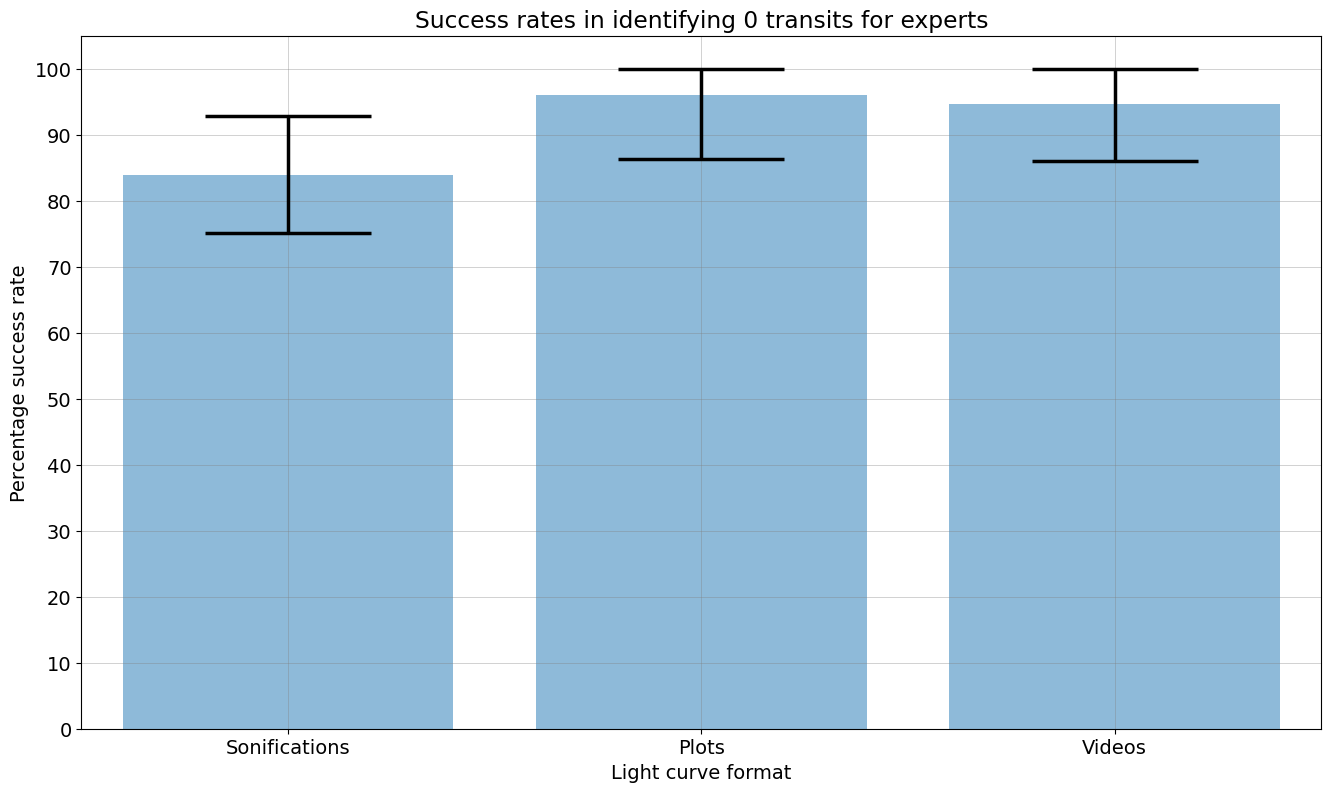

In [29]:
fig = produce_n0(sets_expert,expert_sound,expert_visual,expert_video)[0]
fig.set_title("Success rates in identifying 0 transits for experts")

plt.savefig("New report/Produced figures/n = 0, experts.jpg")

### Collated n = 1,2 data 

Similar to above, just for curves with transits.

In [23]:
def produce_collate12(sets,sound_in,visual_in,video_in):
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[6:18]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

            #print(tot_n,tot_resp)

        suc.append(tot_n/tot_resp*100)
        errsuc.append(np.sqrt(tot_resp)/tot_resp*100)


    f, ax = plt.subplots(figsize=(20,12))
    ax.bar([1,2,3], suc, yerr=error_out(suc,errsuc), 
           error_kw=dict(capthick=2.5, elinewidth=2.5, ecolor='black'), alpha=0.75, align='center', ecolor='black', capsize=60) 

    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0],0, 1.5, linestyle = 'dashed',color= 'black')
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[1],1.5, 2.5, linestyle = 'dashed',color= 'black')
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[2],2.5, 4, linestyle = 'dashed',color= 'black')
    #ax.hlines(guess_0_expert,0, 4, linestyle = 'dashed',color= 'black')
    plt.ylim([0, 105])
    plt.xlim([0.5,3.5])
    ax.set_ylabel("Percentage success rate")
    ax.set_xlabel("Light curve format")
    ax.set_title("Success rates in identifying 1 and 2 transits for experts")
    x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
    x_locator = ticker.FixedLocator([1,2,3])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
    ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    
    return ax

<ipython-input-23-41ca348c618a>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)
<ipython-input-23-41ca348c618a>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


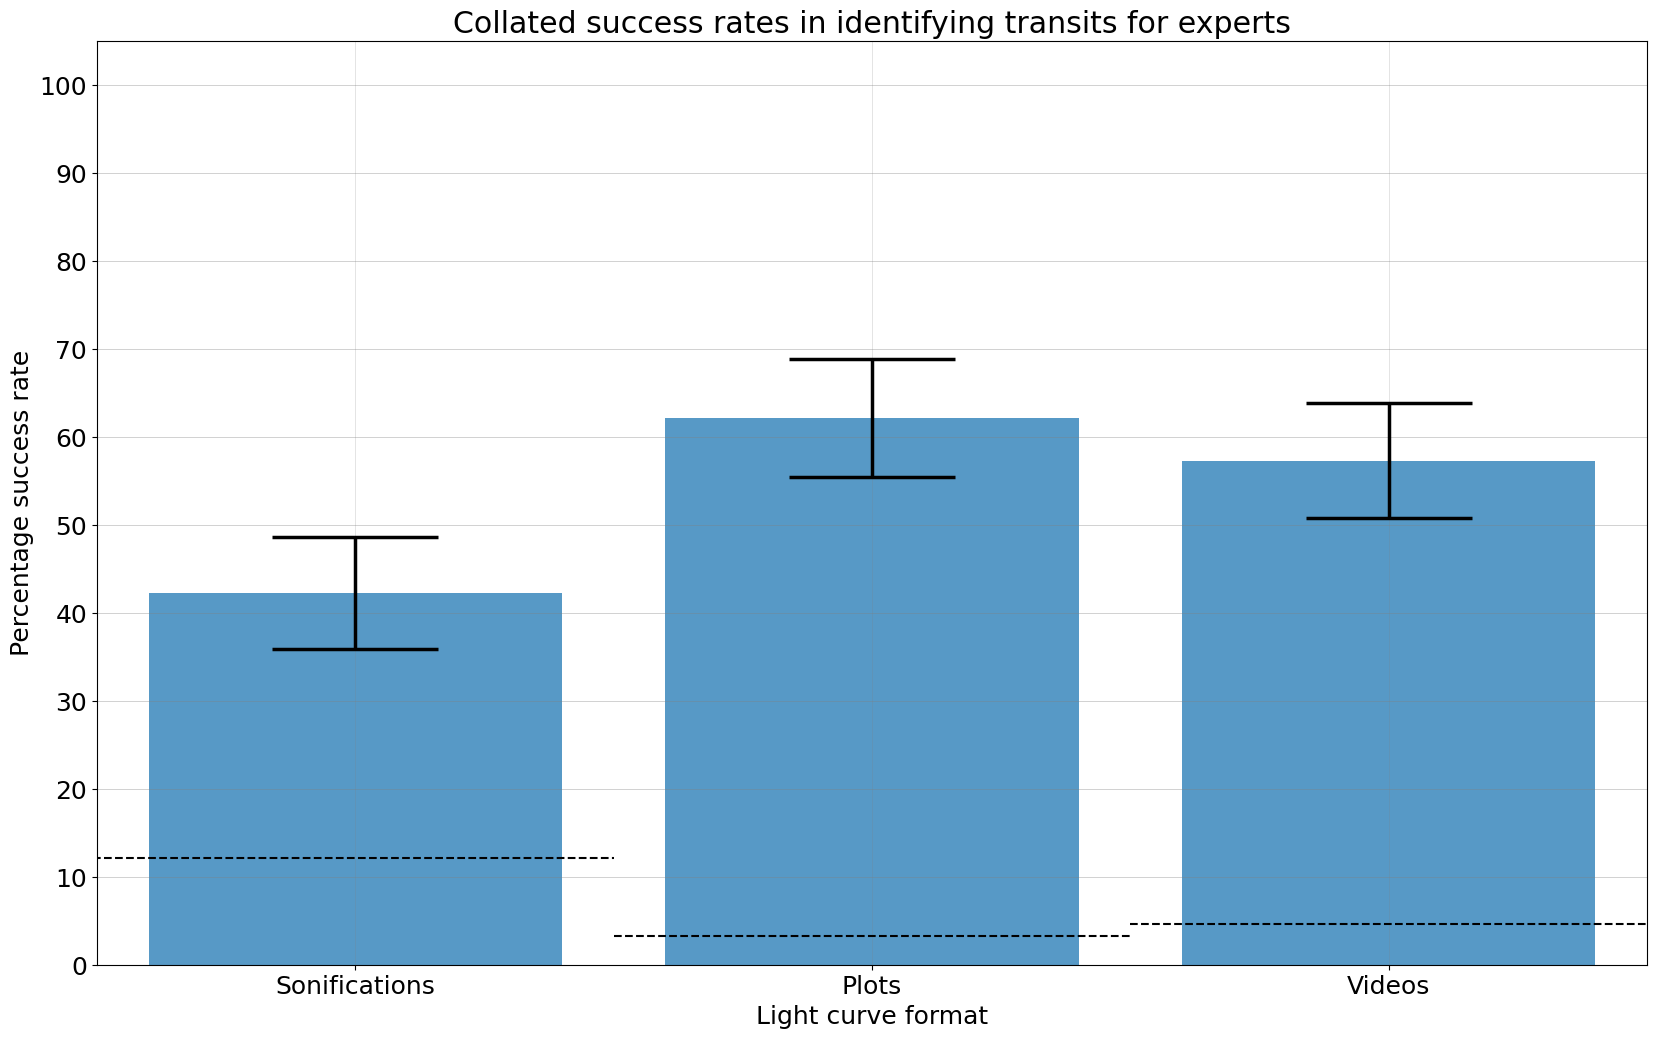

In [24]:
fig = produce_collate12(sets_expert,expert_sound,expert_visual,expert_video)
fig.set_title("Collated success rates in identifying transits for experts")

plt.savefig("New report/Produced figures/Collated n = 1,2, experts.jpg")

### n = 1, 2 data

Produce a scatter graph for success rates in identifying transits in transit curves.

In [27]:
def produce_12(sets,sound_in,visual_in,video_in):
    
    plt.rcParams.update({'font.size': 44})
    
    suc_12_sound = []
    suc_12_sounderr = []

    suc_12_visual = []
    suc_12_visualerr = []

    suc_12_video = []
    suc_12_videoerr = []
    
    snr = []

    for i in sets['Data']:

        j = i.iloc[6:18]
        
        def sort(df):
            df.sort_values(by=['SNR'], inplace=True)
            
        sort(j)

        for k in range(0,len(j['Name']),2):

            if len(snr) < 6:  
                snr.append(int(j.iloc[k]['SNR']))

            if "sonification" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_sound.append(correct/tot*100.0)
                suc_12_sounderr.append(err*100.0)

            elif "plot" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_visual.append(correct/tot*100.0)
                suc_12_visualerr.append(err*100.0)

            else:

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_video.append(correct/tot*100.0)
                suc_12_videoerr.append(err*100.0)

    f, ax = plt.subplots(figsize=(24, 24))
    
    plt.errorbar([i + 0.02*i for i in snr], suc_12_sound, yerr=error_out(suc_12_sound,suc_12_sounderr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color = 'deepskyblue', linestyle="None", 
                 marker='p', markersize=8, capsize=5.5, label='Sonification')

    plt.errorbar(snr, suc_12_visual, yerr=error_out(suc_12_visual,suc_12_visualerr), 
                 capthick=5, elinewidth=2,
                 xerr=None, color='darkviolet', linestyle="None", marker='o', 
                 markersize=8, capsize=5.5, label='Plots')

    plt.errorbar([i - 0.02*i for i in snr], suc_12_video, yerr=error_out(suc_12_video,suc_12_videoerr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color='darkcyan', linestyle="None", 
                 marker='8', markersize=8, capsize=5.5, label='Plots + Sonifications')

    guessperc_errs =  [error_out(calc_12guess(sound_in,visual_in,video_in)[0][0],calc_12guess(sound_in,visual_in,video_in)[1][0]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][1],calc_12guess(sound_in,visual_in,video_in)[1][1]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][2],calc_12guess(sound_in,visual_in,video_in)[1][2])]
                                                                                                                                                    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][0], 0, 100, linestyle = 'dashed',color= 'deepskyblue',
              label = 'Sonification guess percentage')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][0]-guessperc_errs[0][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][0]+guessperc_errs[0][1][0]), 
               facecolor='deepskyblue', alpha=0.25,label='Sonification guess percentage uncertainty')
    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][1], 0, 100, linestyle = 'dashed',color= 'darkviolet',
              label = 'Plots guess percentage')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][1]-guessperc_errs[1][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][1]+guessperc_errs[1][1][0]), 
              facecolor='darkviolet', alpha=0.25, label = 'Plots guess percentage uncertainty')

    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][2], 0, 100, linestyle = 'dashed',color= 'darkcyan',
              label = 'Plots + Sonifications guess percentage')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][2]-guessperc_errs[2][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][2]+guessperc_errs[2][1][0]), 
               facecolor='darkcyan', alpha=0.15, label = 'Plots + Sonifications guess uncertainty')

    plt.xscale("log")
    
    #plt.rcParams.update({'font.size': 27})
    
    ax.set_xlabel("SNR")
    ax.set_ylabel("Percentage success rate")
    #ax.set_title("Success rates for scientific experts as a function of SNR, light curves of 1 and 2 transits")
    x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
    x_locator = ticker.FixedLocator([3,5,7,10,30,100])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    
    plt.rcParams.update({'font.size': 32})
    
    #plt.legend()#,fontsize='xx-large')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [6,7,8,3,4,5,0,1,2]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="center right")
    
    for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
    
    ax.grid(axis="x", color="grey", alpha=.85, linewidth=2)
    ax.grid(axis="y", color="grey", alpha=.85, linewidth=2)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    
    return ax

<ipython-input-27-ad246926bb9e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)
<ipython-input-27-ad246926bb9e>:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-27-ad246926bb9e>:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


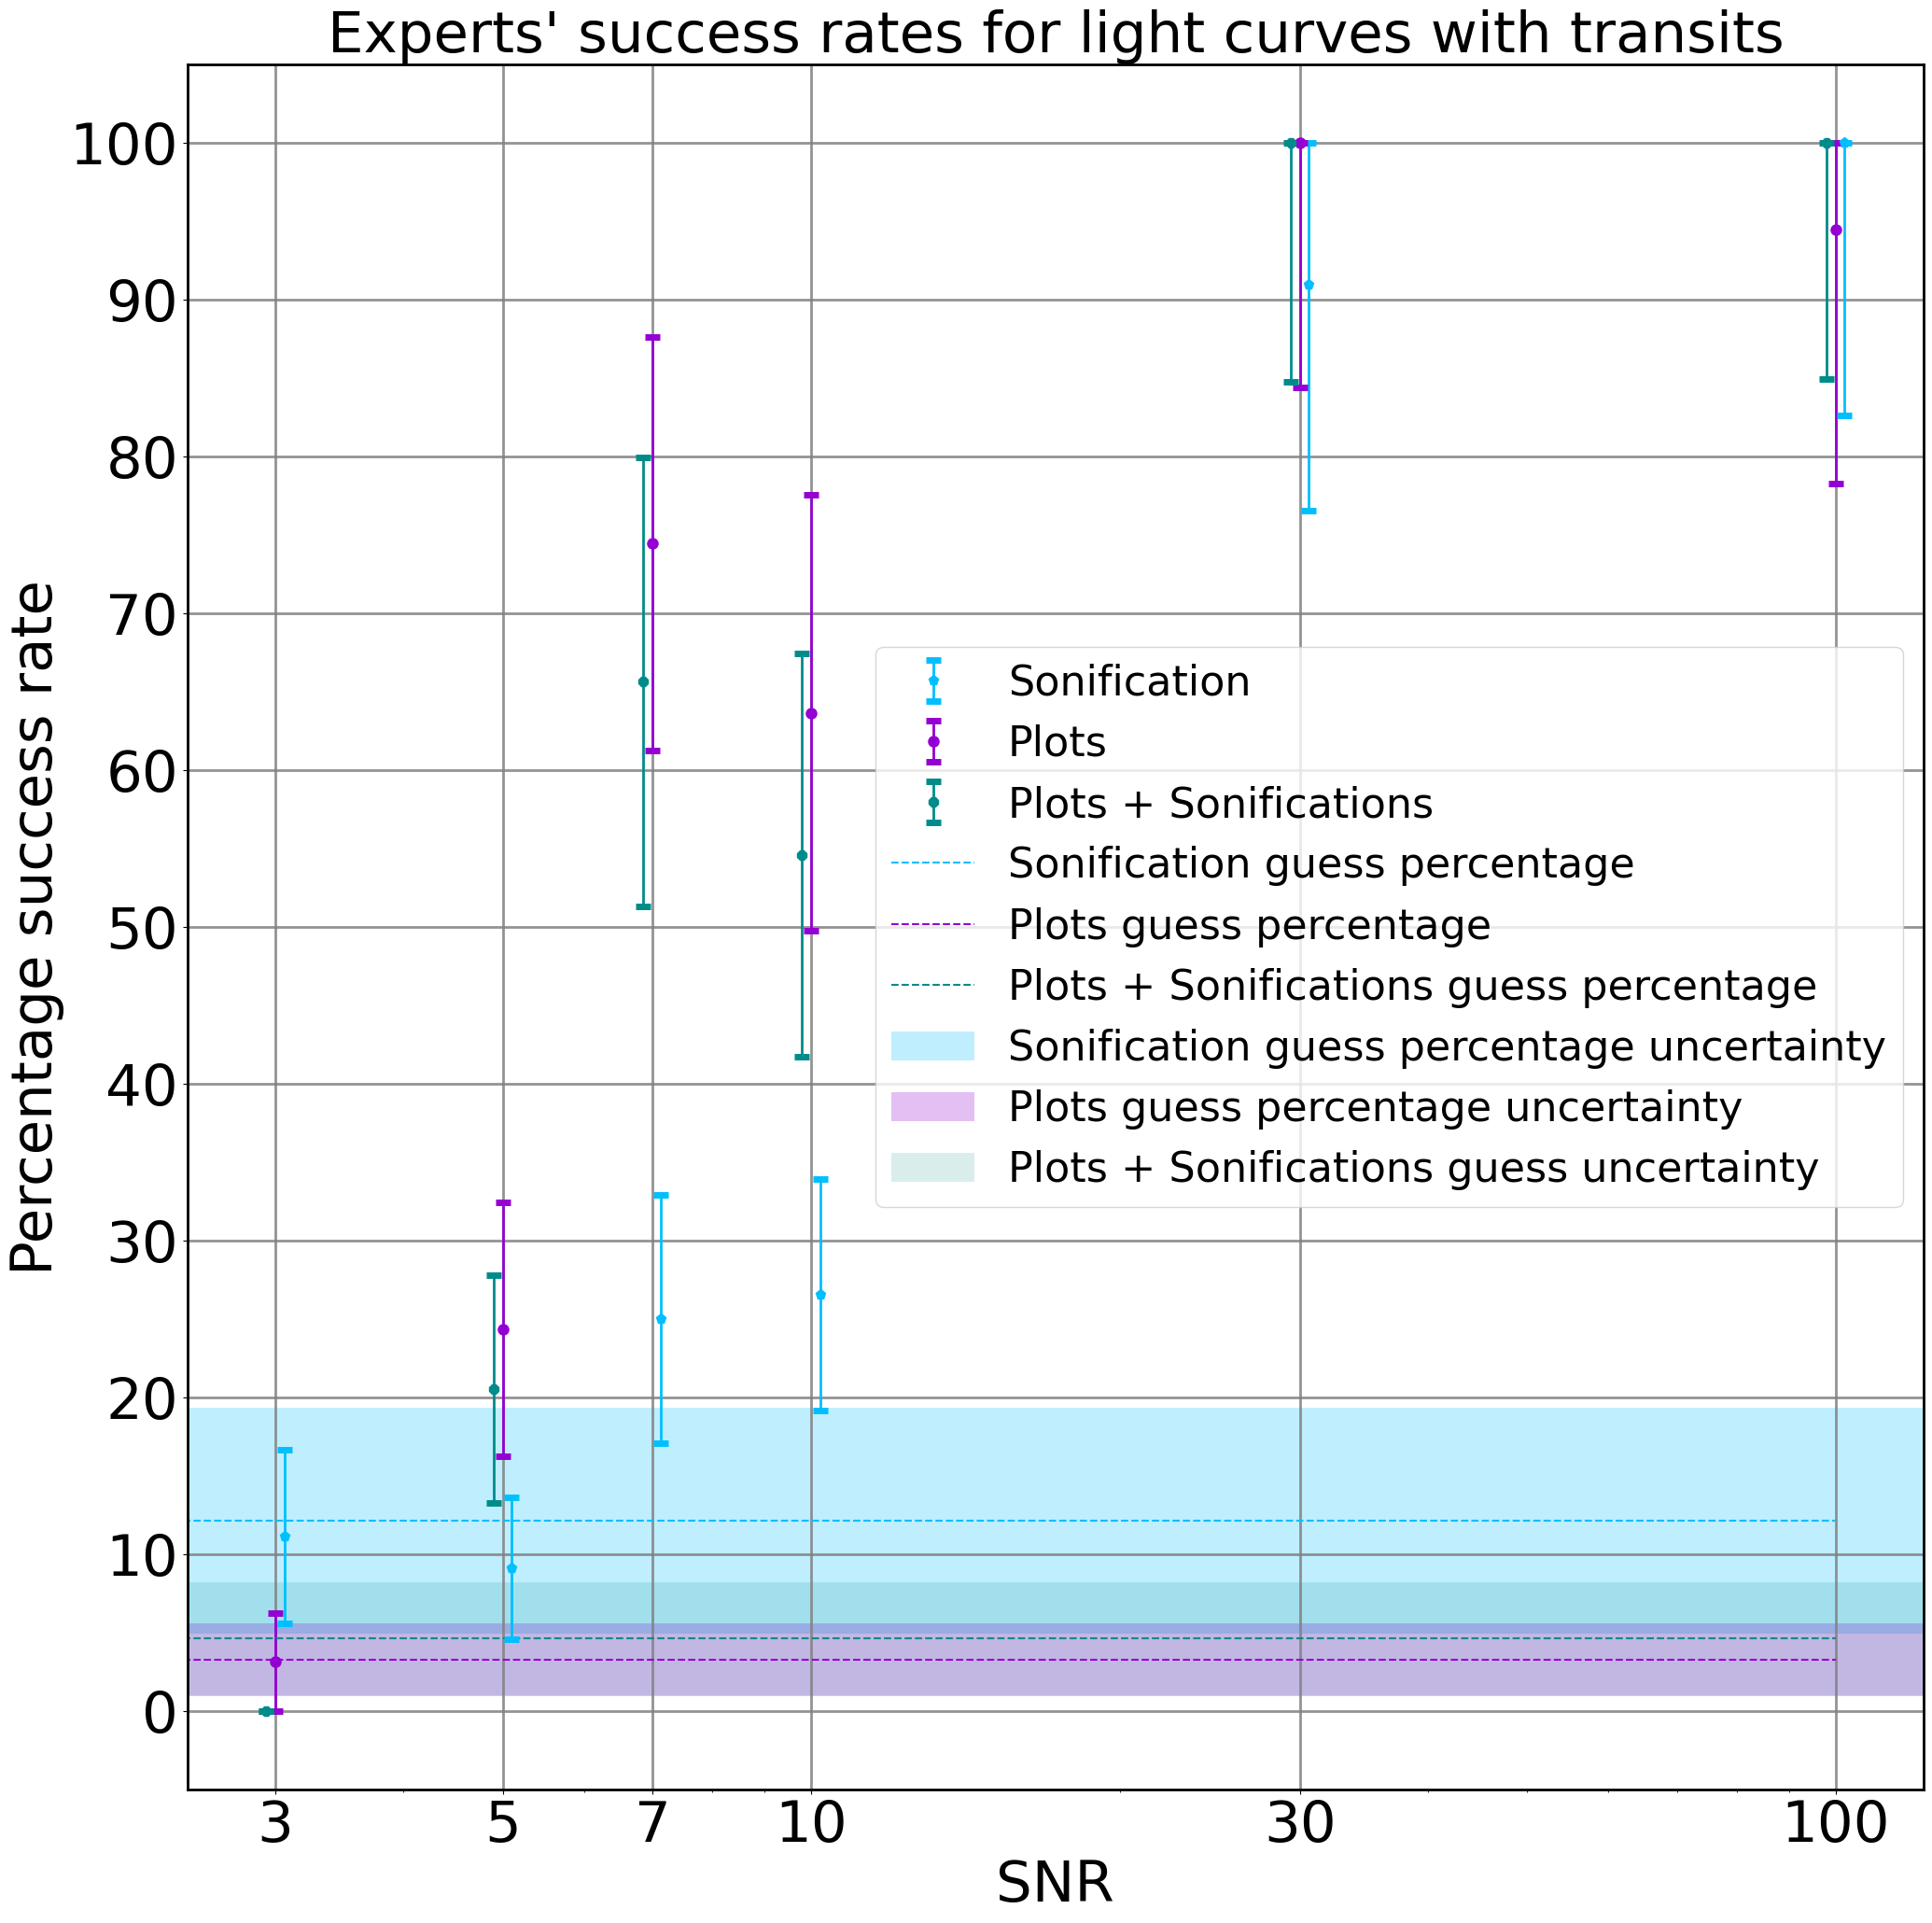

In [28]:
fig = produce_12(sets_expert,expert_sound,expert_visual,expert_video)
fig.set_title("Experts' success rates for light curves with transits",fontsize=44)

plt.savefig("New report/Produced figures/n = 1,2, experts.jpg")

# Non-experts

## Accumulating the data

In [29]:
off = list(expert.index.values)+partials
to_remove = []

for i in off:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
        
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
        
print(len(responses)-len(to_remove),"responses")

total_responses_counter = 0
                
for x in names:
    search_function(x,nexpert_sound,nexpert_visual,nexpert_video)
    #time.sleep(3)

print("Responses and correct answers calculated")

str_df = [get_df_name(nexpert_sound),get_df_name(nexpert_visual),get_df_name(nexpert_video)]

sets_nexpert = pd.DataFrame({'Data':[nexpert_sound,nexpert_visual,nexpert_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)

for x in sets_nexpert['Data']:
    sort(x)
    display(x)

38 responses
Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
8,Here is the link to sonification 111: https://...,0,4,6,4,0,0,2,0,NaN,0.3333333333333333,10,3
14,Here is the link to sonification 161: https://...,0,5,7,5,2,0,0,0,NaN,0.31943828249996997,7,5
10,Here is the link to sonification 123: https://...,0,5,6,5,1,0,0,0,NaN,0.37267799624996495,5,3
5,Here is the link to sonification 168: https://...,0,2,6,2,0,3,1,0,NaN,0.23570226039551587,30,2
17,Here is the link to sonification 110: https://...,0,4,7,4,0,1,1,1,NaN,0.2857142857142857,3,6
1,Here is the link to sonification 174: https://...,0,3,7,3,1,0,3,0,NaN,0.24743582965269675,100,1
3,Here is the link to sonification 10: https://d...,1,5,7,0,5,1,1,0,NaN,0.31943828249996997,30,1
7,Here is the link to sonification 17: https://d...,1,2,6,2,2,1,1,0,NaN,0.23570226039551587,5,2
16,Here is the link to sonification 59: https://d...,1,6,7,0,6,1,0,0,NaN,0.34992710611188255,100,6
12,Here is the link to sonification 28: https://d...,1,1,5,2,1,2,0,0,NaN,0.2,7,4


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to plot 111: https://drive.go...,0,3,7,3,0,0,2,2,NaN,0.24743582965269675,10,1
14,Here is the link to plot 174: https://drive.go...,0,3,6,3,1,0,0,2,NaN,0.28867513459481287,100,5
13,Here is the link to plot 123: https://drive.go...,0,3,6,3,0,2,0,1,NaN,0.28867513459481287,5,5
3,Here is the link to plot 161: https://drive.go...,0,4,5,4,1,0,0,0,NaN,0.4,7,2
6,Here is the link to plot 110: https://drive.go...,0,4,6,4,1,1,0,0,NaN,0.3333333333333333,3,2
16,Here is the link to plot 168: https://drive.go...,0,4,6,4,0,0,1,1,NaN,0.3333333333333333,30,6
12,Here is the link to plot 59: https://drive.goo...,1,6,7,0,6,1,0,0,NaN,0.34992710611188255,100,5
10,Here is the link to plot 10: https://drive.goo...,1,5,5,0,5,0,0,0,NaN,0.447213595499958,30,4
9,Here is the link to plot 17: https://drive.goo...,1,1,5,4,1,0,0,0,NaN,0.2,5,3
8,Here is the link to plot 64: https://drive.goo...,1,1,5,2,1,1,1,0,NaN,0.2,10,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to video 110: https://drive.g...,0,3,7,3,0,1,0,3,NaN,0.24743582965269675,3,1
15,Here is the link to video 111: https://drive.g...,0,4,7,4,1,0,1,1,NaN,0.2857142857142857,10,6
12,Here is the link to video 168: https://drive.g...,0,3,7,3,0,2,1,1,NaN,0.24743582965269675,30,5
11,Here is the link to video 161: https://drive.g...,0,5,5,5,0,0,0,0,NaN,0.447213595499958,7,4
10,Here is the link to video 123: https://drive.g...,0,3,5,3,1,0,0,1,NaN,0.34641016151377546,5,4
9,Here is the link to video 174: https://drive.g...,0,3,5,3,0,1,1,0,NaN,0.34641016151377546,100,4
14,Here is the link to video 10: https://drive.go...,1,6,7,0,6,0,1,0,NaN,0.34992710611188255,30,6
13,Here is the link to video 17: https://drive.go...,1,1,7,4,1,0,1,1,NaN,0.14285714285714285,5,6
8,Here is the link to video 59: https://drive.go...,1,5,5,0,5,0,0,0,NaN,0.447213595499958,100,4
5,Here is the link to video 28: https://drive.go...,1,2,6,3,2,1,0,0,NaN,0.23570226039551587,7,3


## Data analysis for the amateurs

### Estimating guess percentages

In [30]:
print(calc_0guess(nexpert_sound,nexpert_visual,nexpert_video),"Guess percentages + errors for non-transit sonifications, plots and videos - non-experts")
print(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video),"Guess percentages + errors for transit sonifications, plots and videos - non-experts")

([21.993284493284495, 25.11655011655012, 30.371017871017873], [10.549997253747259, 11.346258417871262, 12.847871711038175]) Guess percentages + errors for non-transit sonifications, plots and videos - non-experts
([20.634920634920636, 17.222222222222225, 16.190476190476186], [15.718109931436791, 13.967853124294974, 14.795746577078797]) Guess percentages + errors for transit sonifications, plots and videos - non-experts


### n = 0 data

<ipython-input-28-c90904a0398b>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)
<ipython-input-28-c90904a0398b>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


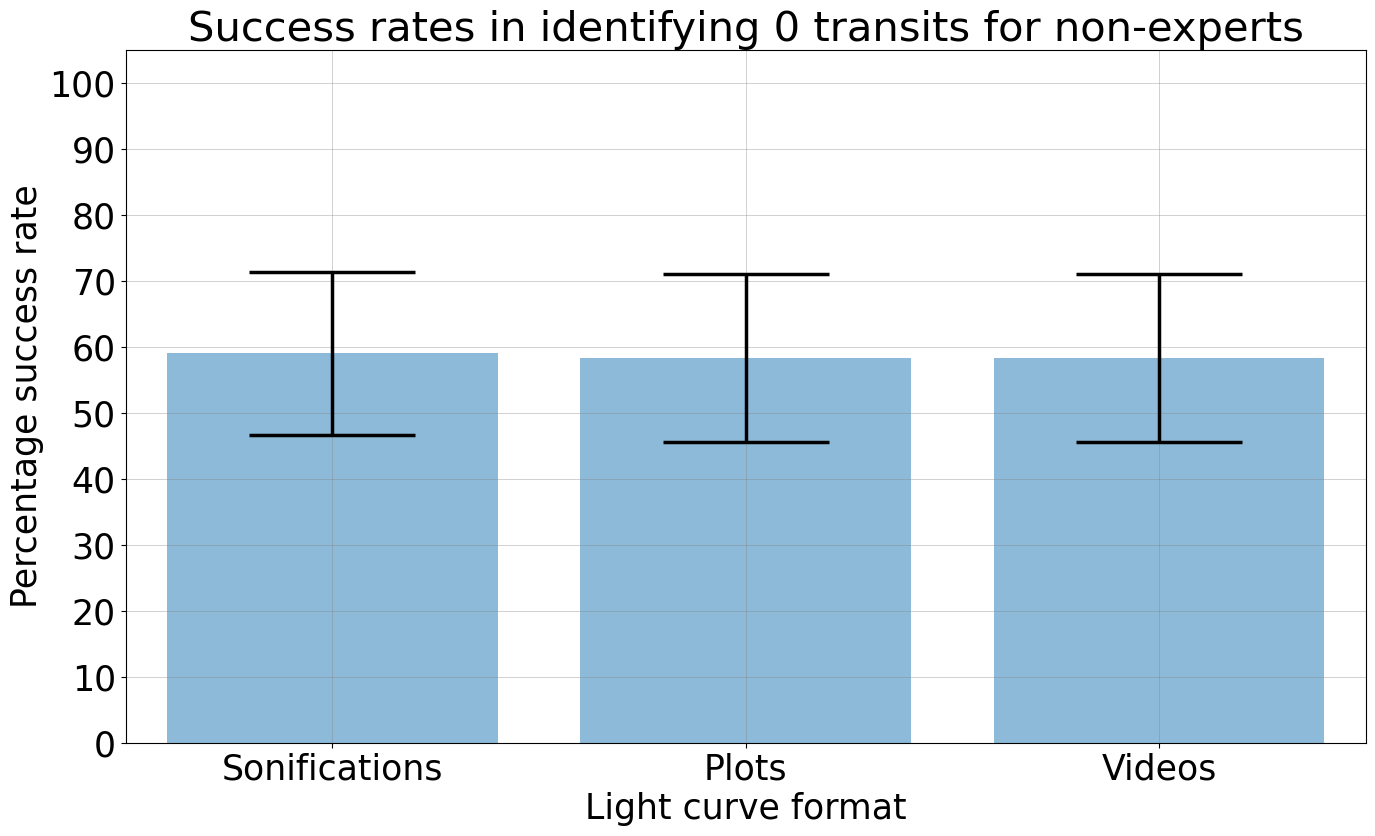

In [34]:
fig = produce_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[0]
fig.set_title("Non-experts' success rates for light curves with transits")

plt.savefig("New report/Produced figures/n = 0, non-experts.jpg")

### Collated n = 1,2 data

<ipython-input-23-41ca348c618a>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)
<ipython-input-23-41ca348c618a>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


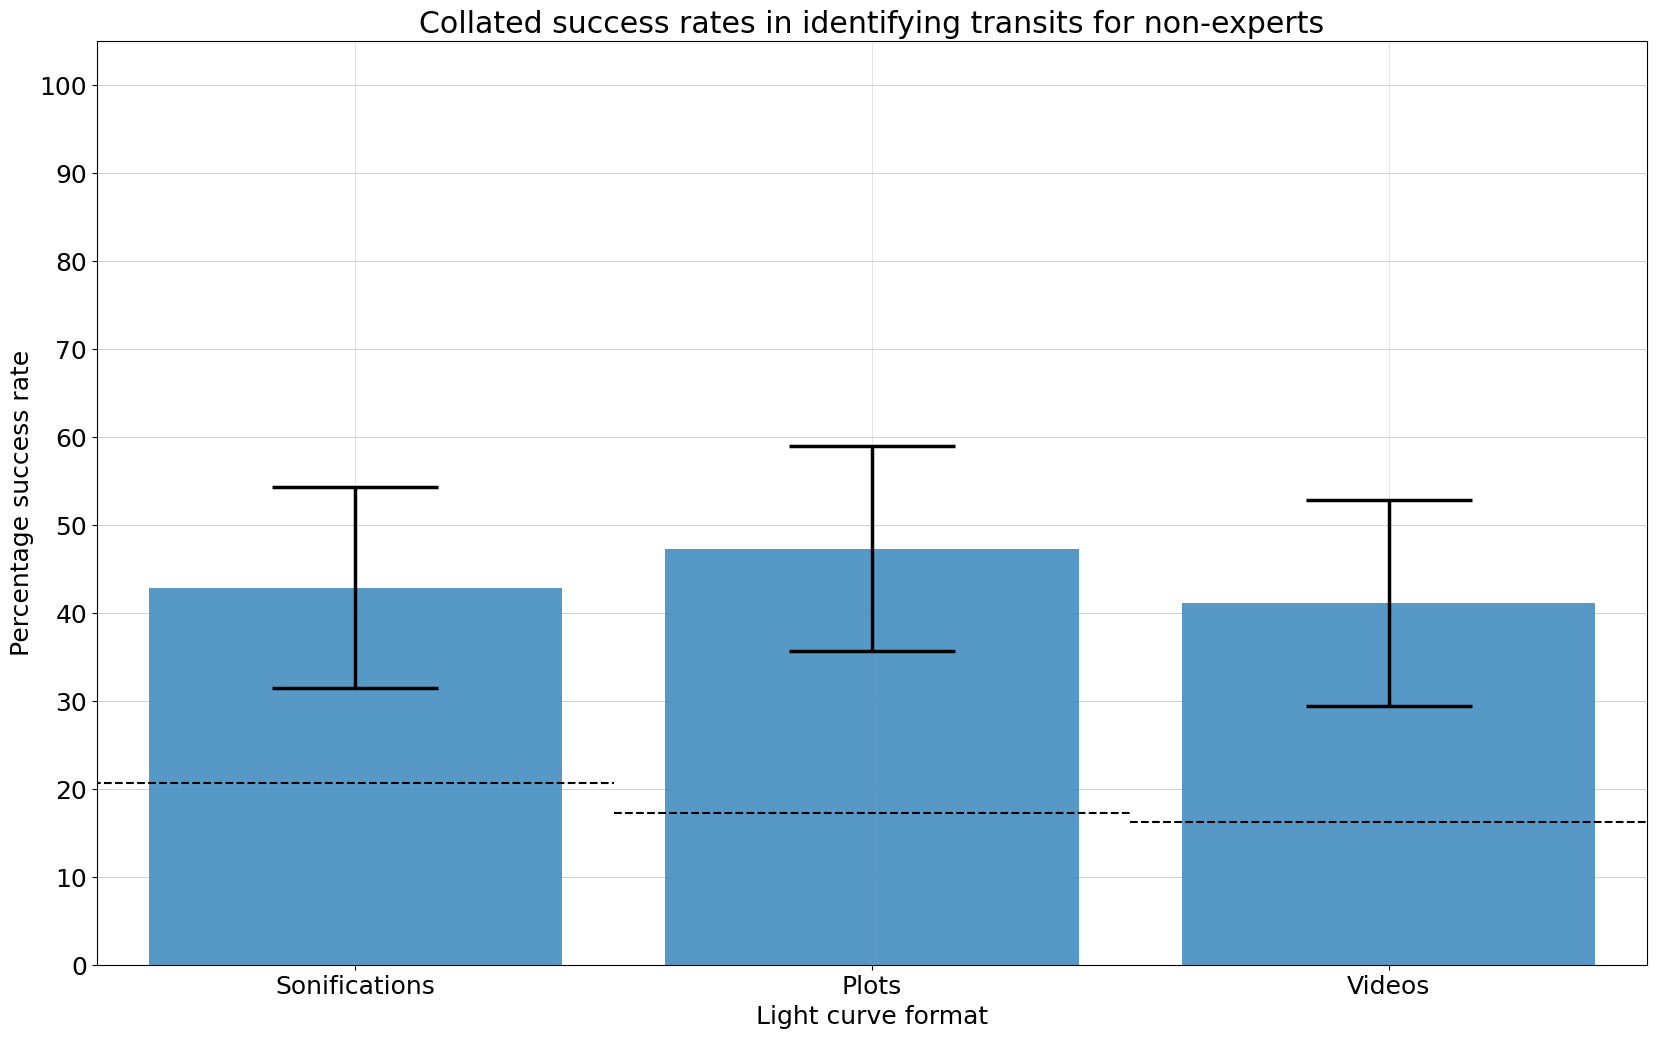

In [30]:
fig = produce_collate12(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)
fig.set_title("Collated success rates in identifying transits for non-experts")

plt.savefig("New report/Produced figures/Collated n = 1,2, non-experts.jpg")

### n = 1, 2 data

In [31]:
def produce_12(sets,sound_in,visual_in,video_in):
    
    plt.rcParams.update({'font.size': 44})
    
    suc_12_sound = []
    suc_12_sounderr = []

    suc_12_visual = []
    suc_12_visualerr = []

    suc_12_video = []
    suc_12_videoerr = []
    
    snr = []

    for i in sets['Data']:

        j = i.iloc[6:18]
        
        def sort(df):
            df.sort_values(by=['SNR'], inplace=True)
            
        sort(j)

        for k in range(0,len(j['Name']),2):

            if len(snr) < 6:  
                snr.append(int(j.iloc[k]['SNR']))

            if "sonification" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_sound.append(correct/tot*100.0)
                suc_12_sounderr.append(err*100.0)

            elif "plot" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_visual.append(correct/tot*100.0)
                suc_12_visualerr.append(err*100.0)

            else:

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_video.append(correct/tot*100.0)
                suc_12_videoerr.append(err*100.0)

    f, ax = plt.subplots(figsize=(24, 24))
    
    plt.errorbar([i + 0.02*i for i in snr], suc_12_sound, yerr=error_out(suc_12_sound,suc_12_sounderr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color = 'deepskyblue', linestyle="None", 
                 marker='p', markersize=8, capsize=5.5)#, label='Sonification')

    plt.errorbar(snr, suc_12_visual, yerr=error_out(suc_12_visual,suc_12_visualerr), 
                 capthick=5, elinewidth=2,
                 xerr=None, color='darkviolet', linestyle="None", marker='o', 
                 markersize=8, capsize=5.5)#, label='Plots')

    plt.errorbar([i - 0.02*i for i in snr], suc_12_video, yerr=error_out(suc_12_video,suc_12_videoerr), 
                 capthick=5, elinewidth=2,
                 xerr=None,color='darkcyan', linestyle="None", 
                 marker='8', markersize=8, capsize=5.5)#, label='Plots + Sonifications')

    guessperc_errs =  [error_out(calc_12guess(sound_in,visual_in,video_in)[0][0],calc_12guess(sound_in,visual_in,video_in)[1][0]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][1],calc_12guess(sound_in,visual_in,video_in)[1][1]),
                      error_out(calc_12guess(sound_in,visual_in,video_in)[0][2],calc_12guess(sound_in,visual_in,video_in)[1][2])]
                                                                                                                                                    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][0], 0, 100, linestyle = 'dashed',color= 'deepskyblue')#, 
            #  label = 'Sonification guess percentage ('+str(round(calc_12guess(sound_in,visual_in,video_in)[0][0]))+'±'+str(round(guessperc_errs[0][0][0]))+'%)')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][0]-guessperc_errs[0][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][0]+guessperc_errs[0][1][0]), 
               facecolor='deepskyblue', alpha=0.25)#,label='Sonification guess percentage uncertainty')
    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][1], 0, 100, linestyle = 'dashed',color= 'darkviolet')#, 
             # label = 'Plots guess percentage ('+str(round(calc_12guess(sound_in,visual_in,video_in)[0][1]))+'±'+str(round(guessperc_errs[1][0][0]))+'%)')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][1]-guessperc_errs[1][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][1]+guessperc_errs[1][1][0]), 
              facecolor='darkviolet', alpha=0.25)#, label = 'Plots guess percentage uncertainty')

    
    ax.hlines(calc_12guess(sound_in,visual_in,video_in)[0][2], 0, 100, linestyle = 'dashed',color= 'darkcyan')#, 
              #label = 'Plots + sonifications guess percentage ('+str(round(calc_12guess(sound_in,visual_in,video_in)[0][2]))+'±'+str(round(guessperc_errs[2][0][0]))+'%)')
    ax.axhspan(calc_12guess(sound_in,visual_in,video_in)[0][2]-guessperc_errs[2][0][0], (calc_12guess(sound_in,visual_in,video_in)[0][2]+guessperc_errs[2][1][0]), 
               facecolor='darkcyan', alpha=0.15)#, label = 'Plots + Sonifications guess uncertainty')

    plt.xscale("log")
    
    #plt.rcParams.update({'font.size': 27})
    
    ax.set_xlabel("SNR")
    ax.set_ylabel("Percentage success rate")
    #ax.set_title("Success rates for scientific experts as a function of SNR, light curves of 1 and 2 transits")
    x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
    x_locator = ticker.FixedLocator([3,5,7,10,30,100])
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])

    for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
    
    ax.grid(axis="x", color="grey", alpha=.85, linewidth=2)
    ax.grid(axis="y", color="grey", alpha=.85, linewidth=2)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    
    return ax

<ipython-input-31-f752170b445f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)
<ipython-input-31-f752170b445f>:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-31-f752170b445f>:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


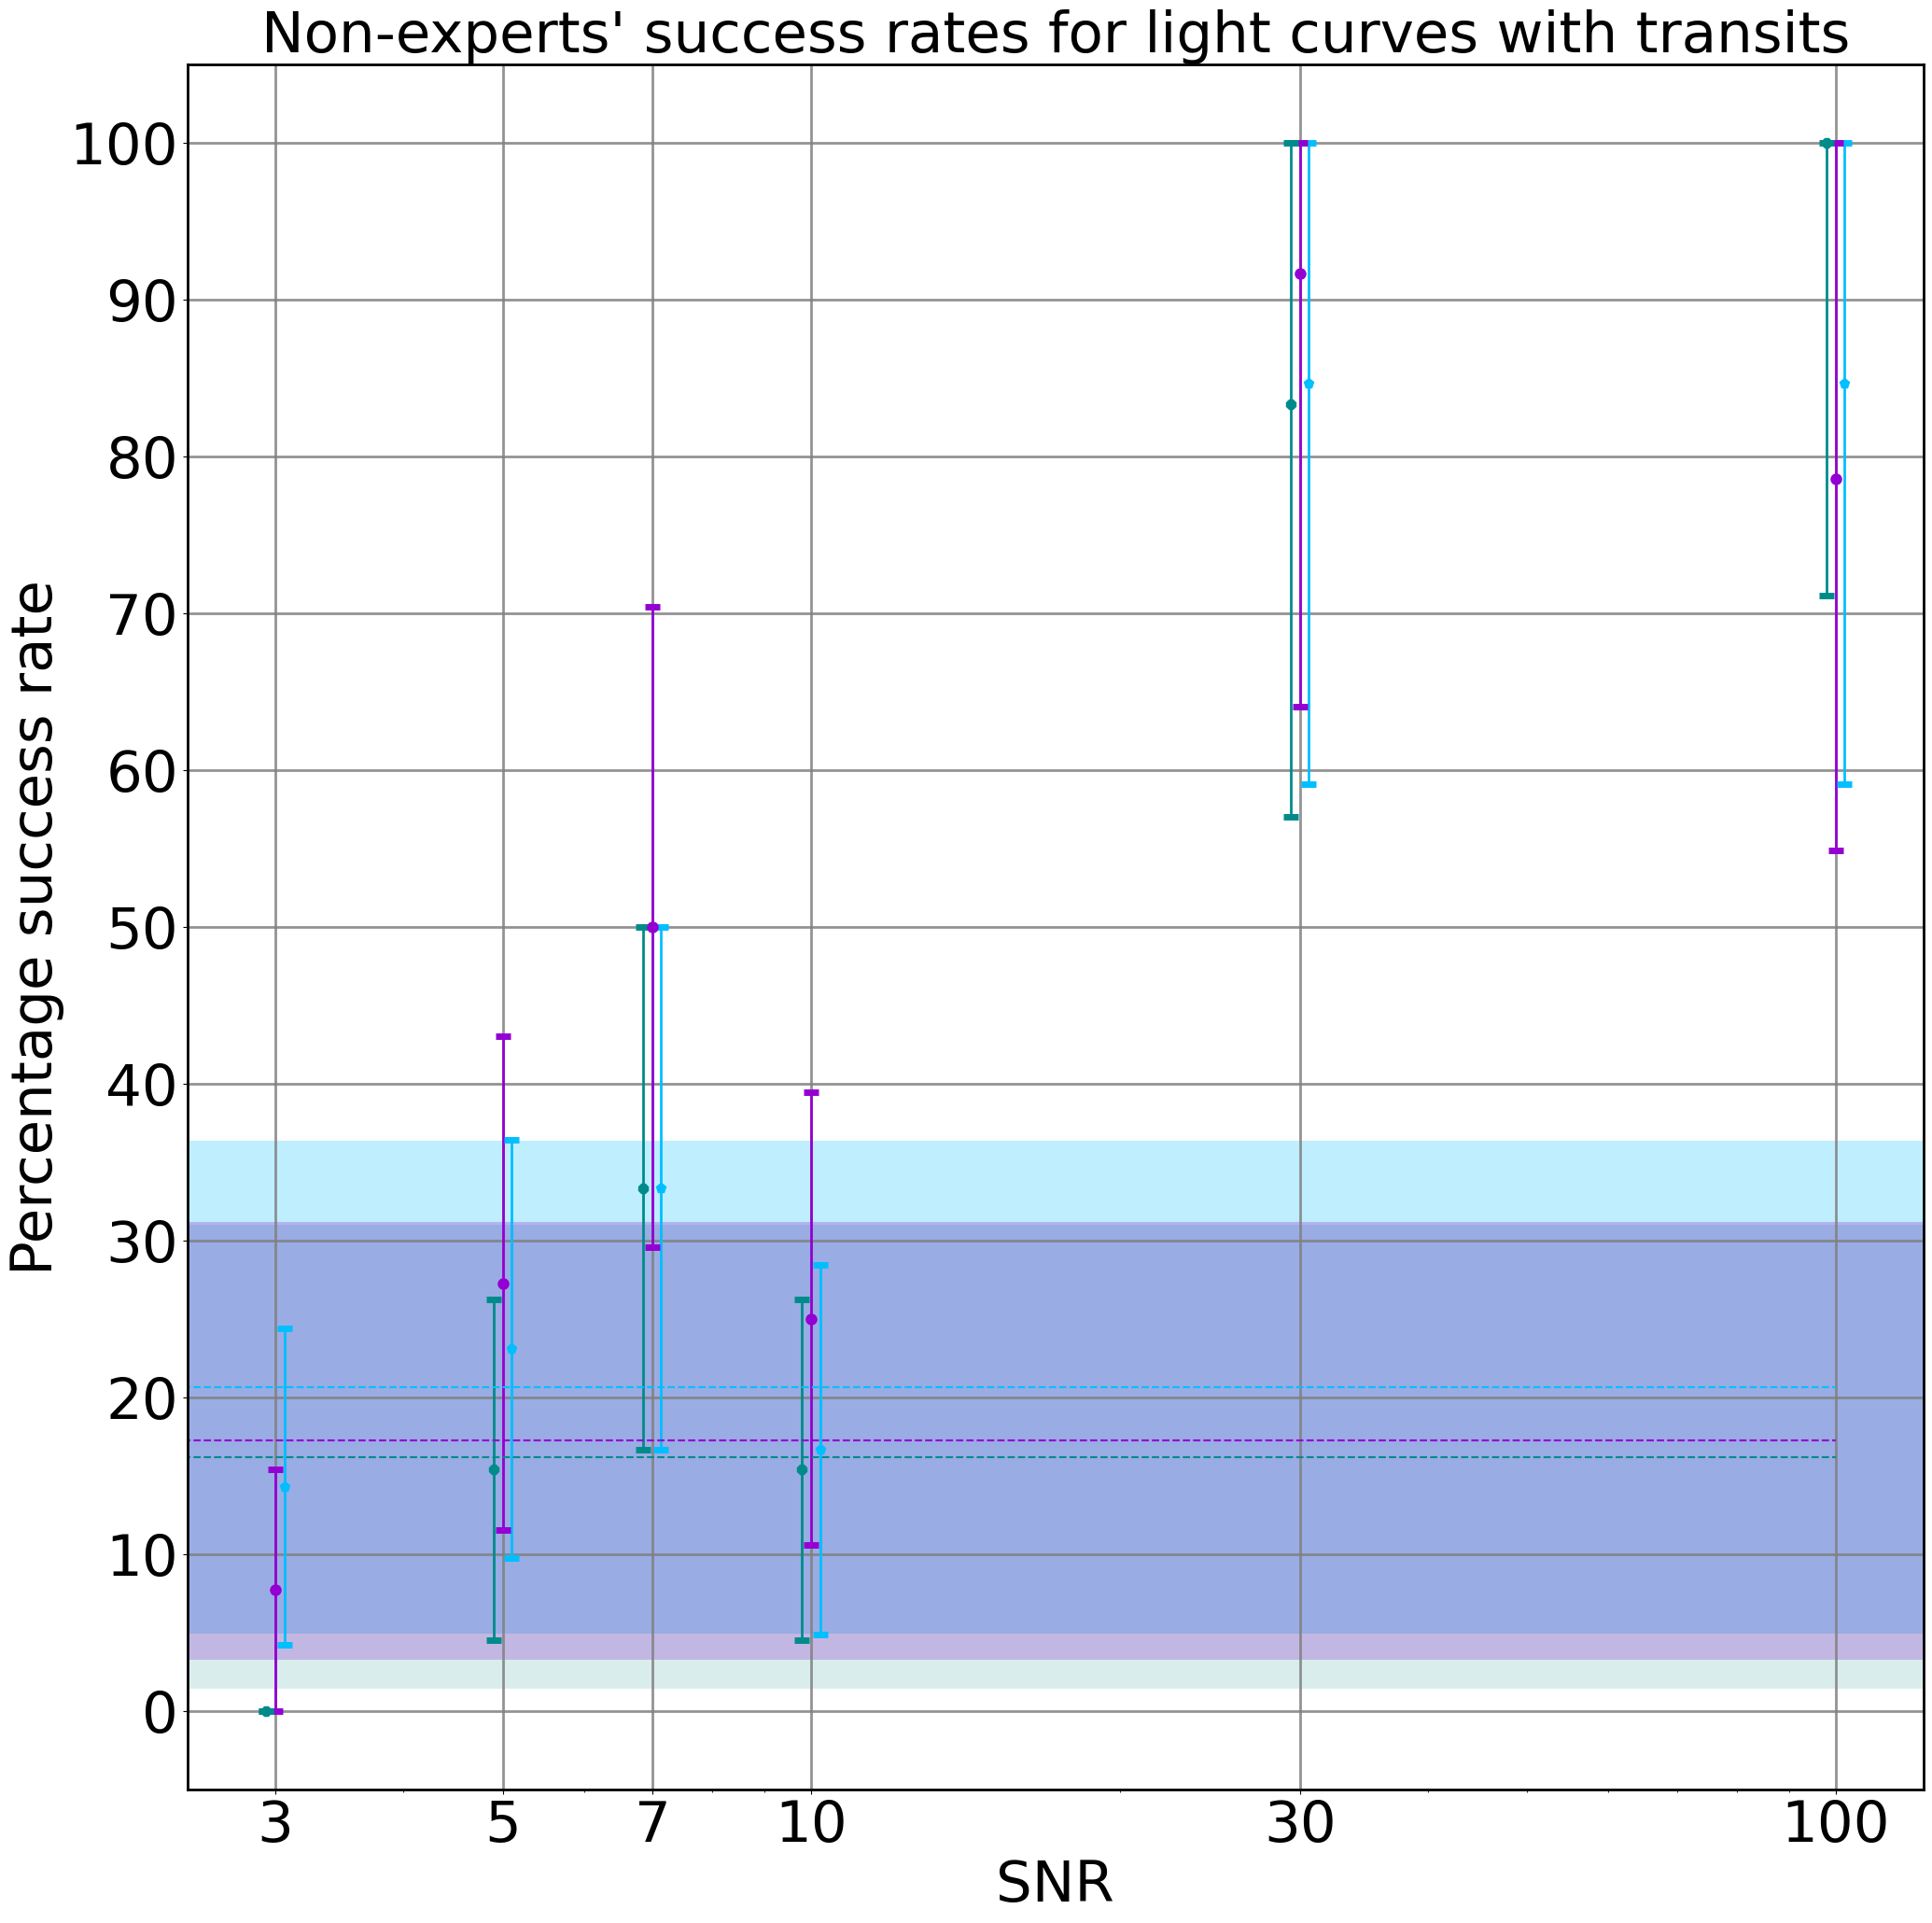

In [32]:
fig = produce_12(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)
fig.set_title("Non-experts' success rates for light curves with transits",fontsize=44)

plt.savefig("New report/Produced figures/n = 1,2, non-experts.jpg")

# Partial & non- experts

## Accumulating the data

In [33]:
off = expert_indices
to_remove = []

for i in off:
    to_remove.append(i)
    
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
        
print(len(responses)-len(to_remove),"responses")

total_responses_counter = 0
                
for x in names:
    search_function(x,pexpert_sound,pexpert_visual,pexpert_video)

print("Responses and correct answers calculated")

str_df = [get_df_name(pexpert_sound),get_df_name(pexpert_visual),get_df_name(pexpert_video)]

sets_pexpert = pd.DataFrame({'Data':[pexpert_sound,pexpert_visual,pexpert_video],
                    'String': str_df})
    
def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets_pexpert['Data']:
    sort(x)
    display(x)

74 responses
Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
8,Here is the link to sonification 111: https://...,0,7,12,7,0,0,5,0,NaN,0.22047927592204922,10,3
14,Here is the link to sonification 161: https://...,0,11,13,11,2,0,0,0,NaN,0.2551249838734923,7,5
10,Here is the link to sonification 123: https://...,0,10,12,10,2,0,0,0,NaN,0.26352313834736496,5,3
5,Here is the link to sonification 168: https://...,0,7,11,7,0,3,1,0,NaN,0.24052284646041733,30,2
17,Here is the link to sonification 110: https://...,0,8,11,8,0,1,1,1,NaN,0.25712973861329,3,6
1,Here is the link to sonification 174: https://...,0,8,16,8,2,2,4,0,NaN,0.1767766952966369,100,1
3,Here is the link to sonification 10: https://d...,1,13,16,0,13,2,1,0,NaN,0.22534695471649932,30,1
7,Here is the link to sonification 17: https://d...,1,2,11,7,2,1,1,0,NaN,0.128564869306645,5,2
16,Here is the link to sonification 59: https://d...,1,10,11,0,10,1,0,0,NaN,0.2874797872880345,100,6
12,Here is the link to sonification 28: https://d...,1,4,11,4,4,3,0,0,NaN,0.18181818181818182,7,4


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to plot 111: https://drive.go...,0,10,14,10,0,0,2,2,NaN,0.22587697572631282,10,1
14,Here is the link to plot 174: https://drive.go...,0,7,11,7,1,0,0,3,NaN,0.24052284646041733,100,5
13,Here is the link to plot 123: https://drive.go...,0,8,11,8,0,2,0,1,NaN,0.25712973861329,5,5
3,Here is the link to plot 161: https://drive.go...,0,7,9,7,1,0,0,0,NaN,0.2939723678960656,7,2
6,Here is the link to plot 110: https://drive.go...,0,6,10,6,2,1,1,0,NaN,0.2449489742783178,3,2
16,Here is the link to plot 168: https://drive.go...,0,8,10,8,0,0,1,1,NaN,0.282842712474619,30,6
12,Here is the link to plot 59: https://drive.goo...,1,12,13,0,12,1,0,0,NaN,0.2664693550105965,100,5
10,Here is the link to plot 10: https://drive.goo...,1,10,11,1,10,0,0,0,NaN,0.2874797872880345,30,4
9,Here is the link to plot 17: https://drive.goo...,1,3,11,8,3,0,0,0,NaN,0.15745916432444337,5,3
8,Here is the link to plot 64: https://drive.goo...,1,6,11,2,6,2,1,0,NaN,0.22268088570756162,10,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS test result,σ,SNR,Survey
0,Here is the link to video 110: https://drive.g...,0,9,16,9,3,1,0,3,NaN,0.1875,3,1
15,Here is the link to video 111: https://drive.g...,0,7,11,7,1,1,1,1,NaN,0.24052284646041733,10,6
12,Here is the link to video 168: https://drive.g...,0,9,13,9,0,2,1,1,NaN,0.23076923076923078,30,5
11,Here is the link to video 161: https://drive.g...,0,10,10,10,0,0,0,0,NaN,0.31622776601683794,7,4
10,Here is the link to video 123: https://drive.g...,0,9,11,9,1,0,0,1,NaN,0.2727272727272727,5,4
9,Here is the link to video 174: https://drive.g...,0,8,11,8,0,2,1,0,NaN,0.25712973861329,100,4
14,Here is the link to video 10: https://drive.go...,1,10,11,0,10,0,1,0,NaN,0.2874797872880345,30,6
13,Here is the link to video 17: https://drive.go...,1,1,11,8,1,0,1,1,NaN,0.09090909090909091,5,6
8,Here is the link to video 59: https://drive.go...,1,11,11,0,11,0,0,0,NaN,0.30151134457776363,100,4
5,Here is the link to video 28: https://drive.go...,1,7,12,3,7,1,1,0,NaN,0.22047927592204922,7,3


## Analysis

### Estimating guess percentages

In [34]:
print(calc_0guess(pexpert_sound,pexpert_visual,pexpert_video),"Guess percentages + errors for non-transit sonifications, plots and videos - partial and non-experts")
print(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video),"Guess percentages + errors for transit sonifications, plots and videos - partial and non-experts")

([29.669540229885058, 24.47066822066822, 27.02294685990338], [8.268223621125067, 8.301622058891516, 8.646921760921867]) Guess percentages + errors for non-transit sonifications, plots and videos - partial and non-experts
([15.569153069153069, 11.397306397306396, 14.306526806526804], [10.000084067922941, 8.396502534728914, 9.697074802774418]) Guess percentages + errors for transit sonifications, plots and videos - partial and non-experts


### n = 0 data

In [33]:
fig = produce_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[0]
fig.set_title("Success rates in identifying 0 transits for partial and non-experts")

plt.savefig("New report/Produced figures/n = 0, partial and non-experts.jpg")

NameError: name 'produce_n0' is not defined

### Collated n = 1,2 data

<ipython-input-23-41ca348c618a>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)
<ipython-input-23-41ca348c618a>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


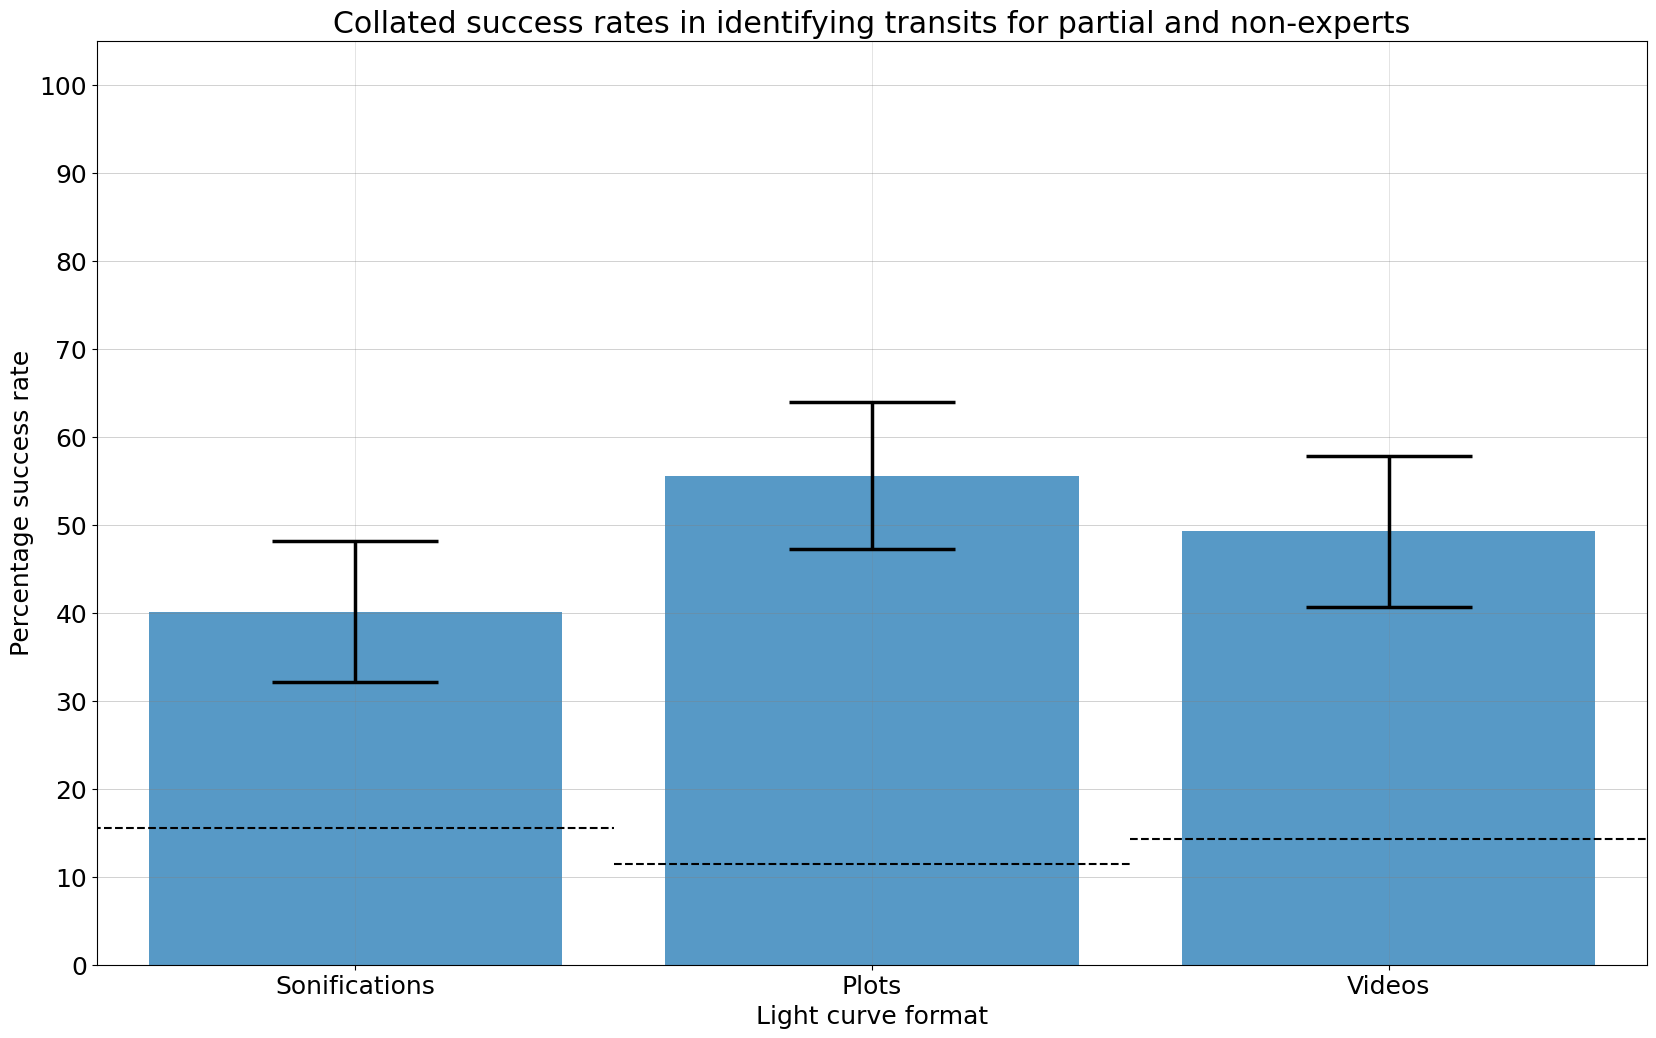

In [35]:
fig = produce_collate12(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)
fig.set_title("Collated success rates in identifying transits for partial and non-experts")

plt.savefig("New report/Produced figures/Collated n = 1,2, partial and non-experts.jpg")

### n = 1,2 data

<ipython-input-31-f752170b445f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)
<ipython-input-31-f752170b445f>:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-31-f752170b445f>:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


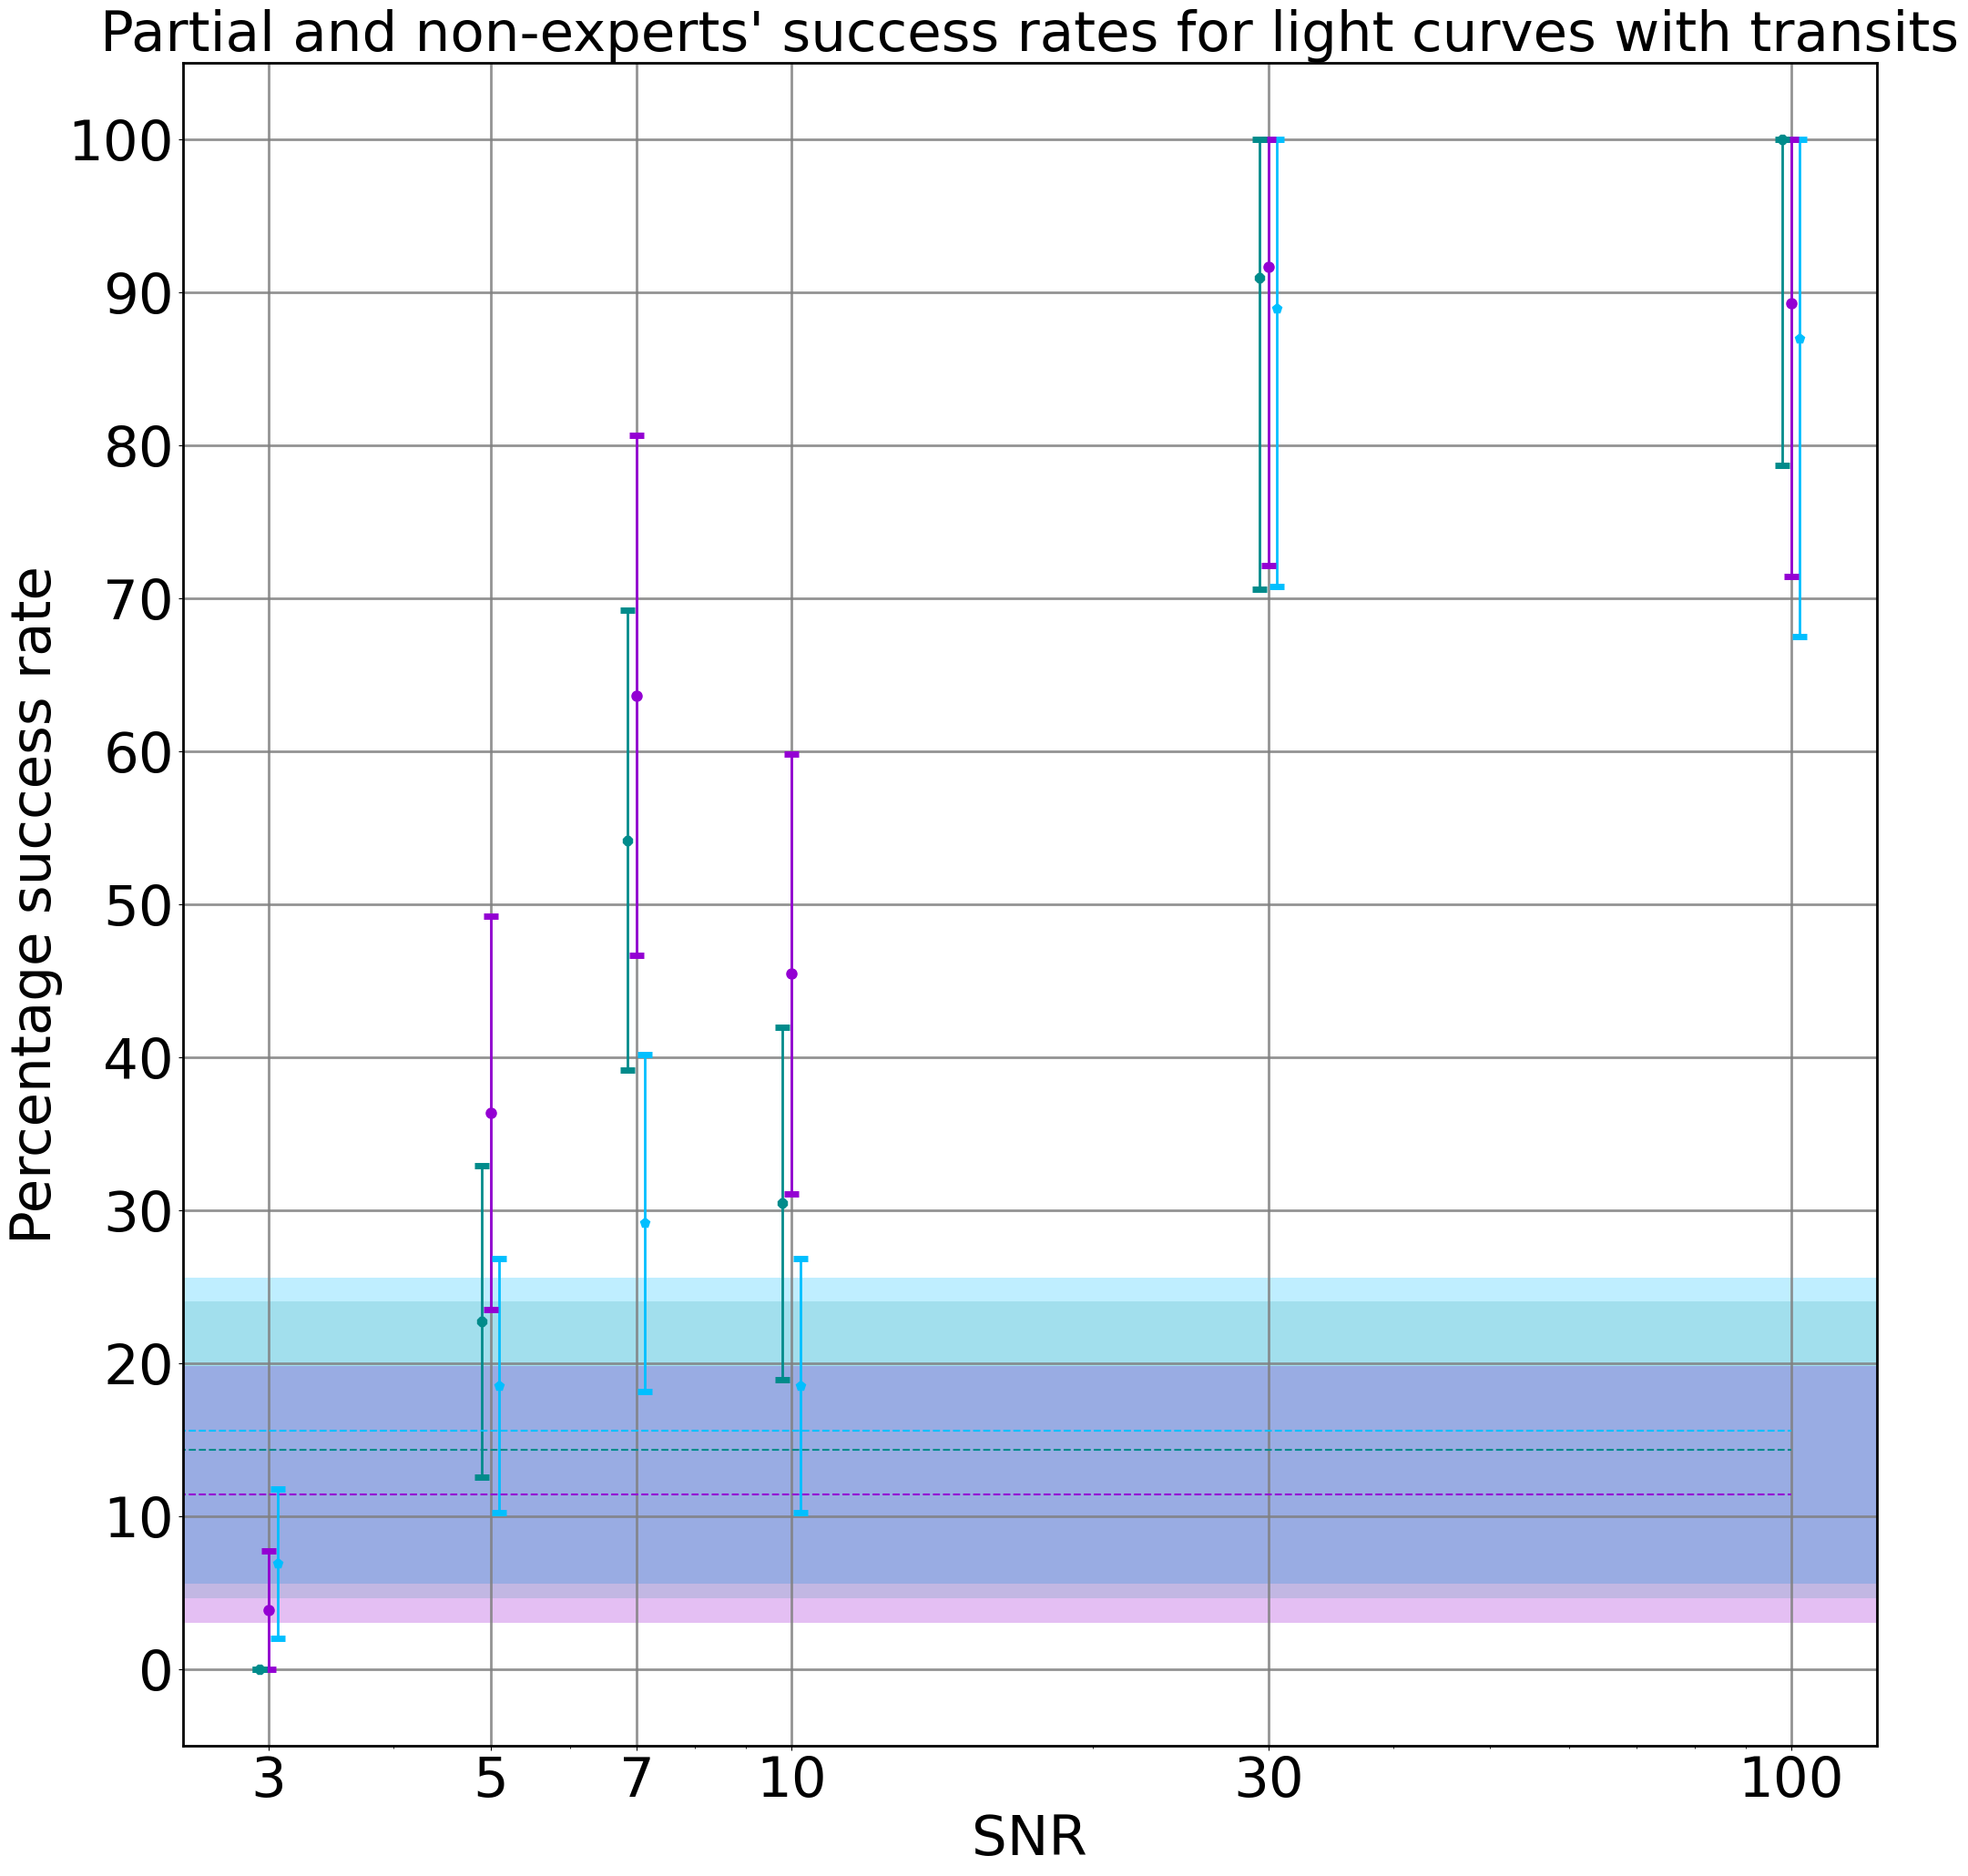

In [35]:
fig = produce_12(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)
fig.set_title("Partial and non-experts' success rates for light curves with transits",fontsize=44)

plt.savefig("New report/Produced figures/n = 1,2, partial and non-experts.jpg")

# Combining the sub-groups

Modified function purely for extracting success rates and not a figure. 

In [35]:
def successrates_n0(sets,sound_in,visual_in,video_in):
    
    plt.rcParams.update({'font.size': 22})
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[0:6]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

            #print(tot_n,tot_resp)

        suc.append(tot_n/tot_resp*100)
        errsuc.append(np.sqrt(tot_n)/tot_resp*100)

    return suc, errsuc

## n = 0

### Three n = 0 success rates on one figure.

Then combine the success rates for all three subgroups on the no-transit curves into one figure.

<ipython-input-143-a93e97158c87>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


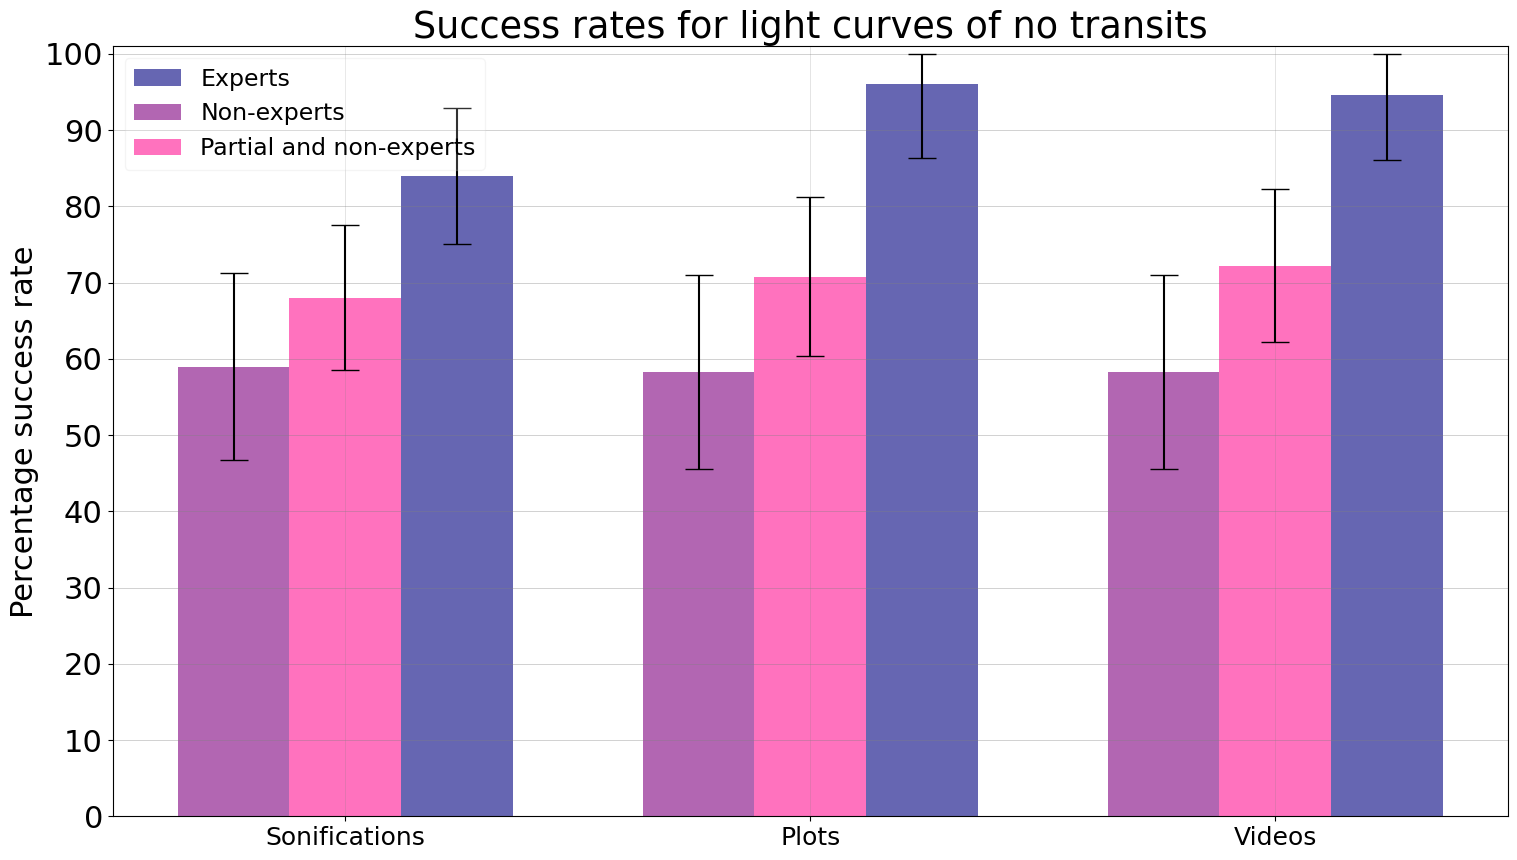

In [143]:
suc_expert = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[0]
errsuc_expert = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[1]
suc_nexpert = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[0]
errsuc_nexpert = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[1]
suc_pexpert = successrates_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[0]
errsuc_pexpert = successrates_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[1]

f, ax = plt.subplots(111,figsize=(18,10))
ax = plt.subplot(111)

x_loc = [0,0.5,1]

ax.bar([x + 0.12 for x in x_loc], suc_expert, yerr = error_out(suc_expert,errsuc_expert), width=0.12, 
       color='navy', align='center',alpha=0.6,capsize=10,label='Experts')

expertguess = calc_0guess(expert_sound,expert_visual,expert_video)
#for i in range(0,len(expertguess)):
 #   if i == 1:
  #      ax.hlines(expertguess[i], x_loc[i]+0.05, x_loc[i]+0.15, linestyle = 'dashed',color= 'black',label='Guess percentage')
  #  else:
   #     ax.hlines(expertguess[i], x_loc[i]+0.05, x_loc[i]+0.15, linestyle = 'dashed',color= 'black')

ax.bar([x - 0.12 for x in x_loc], suc_nexpert, yerr = error_out(suc_nexpert,errsuc_nexpert), width=0.12, 
       color='purple', align='center',alpha=0.6,capsize=10,label='Non-experts')

nexpertguess = calc_0guess(nexpert_sound,nexpert_visual,nexpert_video)
#for i in range(0,len(nexpertguess)):
 #   if i == 1:
  #      ax.hlines(nexpertguess[i], x_loc[i]-0.15, x_loc[i]-0.05, linestyle = 'dashed',color= 'black')
   # else:
    #    ax.hlines(nexpertguess[i], x_loc[i]-0.15, x_loc[i]-0.05, linestyle = 'dashed',color= 'black')

ax.bar([0,0.5,1], suc_pexpert, yerr = error_out(suc_pexpert,errsuc_pexpert), width=0.12, 
       color='deeppink', align='center',alpha=0.6,capsize=10,label='Partial and non-experts')

pexpertguess = calc_0guess(pexpert_sound,pexpert_visual,pexpert_video)
#for i in range(0,len(pexpertguess)):
 #   if i == 1:
  #      ax.hlines(pexpertguess[i], x_loc[i]-0.05, x_loc[i]+0.05, linestyle = 'dashed',color= 'black')
  #  else:
   #     ax.hlines(pexpertguess[i], x_loc[i]-0.05, x_loc[i]+0.05, linestyle = 'dashed',color= 'black')

ax.set_xlabel("",fontsize=20)
ax.set_xlim(-0.25,1.25)
#ax.hlines(guess_0_expert, -1, 2, linestyles='dashed', label='Experts estimated guess percentage',color='black')
#ax.hlines(guess_0_amateur, -1, 2, colors='k', linestyles='dashed', label='Non-experts estimated guess percentage',color='gray')


plt.xticks(x_loc,fontsize=18)
plt.rcParams.update({'font.size': 22})

ax.set_ylabel("Percentage success rate")
ax.set_ylim(0,101)

ax.axvspan(-0.5, 0.25, facecolor='deepskyblue', alpha=0)
ax.axvspan(0.25, 0.75, facecolor='darkviolet', alpha=0)
ax.axvspan(0.75, 1.5, facecolor='darkcyan', alpha=0)

ax.set_title("Success rates for light curves of no transits")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)

plt.rcParams.update({'font.size': 17})
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

ax.legend(loc='best',framealpha=0.2)

plt.savefig("New report/Produced figures/n = 0 transits, bar.jpg")

### Two subgroup n = 0 figure

<ipython-input-36-e14afa3cac04>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


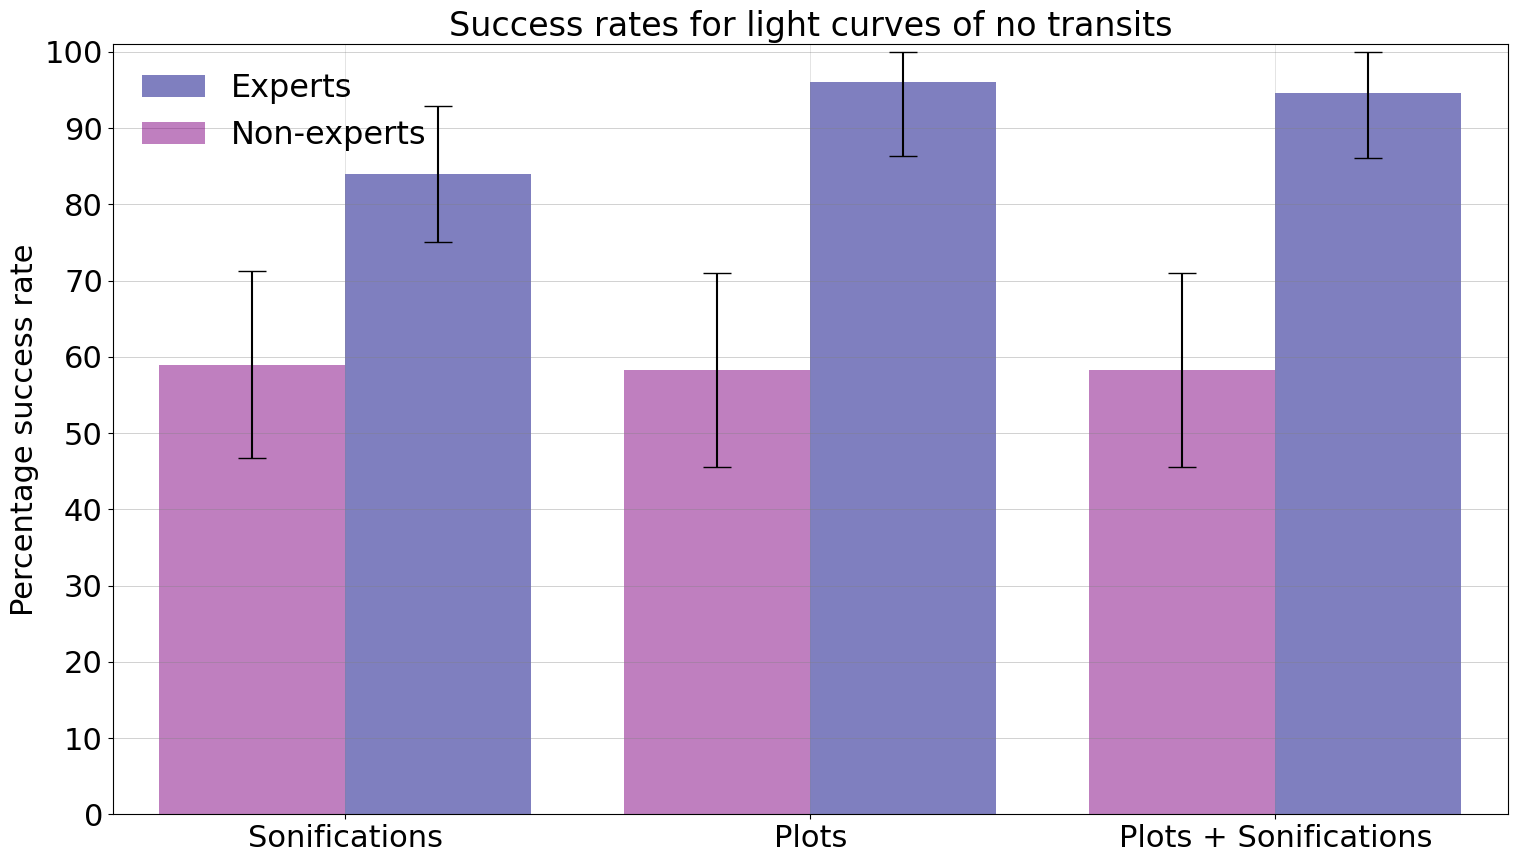

In [36]:
suc_expert = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[0]
errsuc_expert = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[1]
suc_nexpert = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[0]
errsuc_nexpert = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[1]

f, ax = plt.subplots(111,figsize=(18,10))
ax = plt.subplot(111)

x_loc = [0,0.5,1]

ax.bar([x + 0.1 for x in x_loc], suc_expert, yerr = error_out(suc_expert,errsuc_expert), width=0.2, 
       color='navy', align='center',alpha=0.5,capsize=10,label='Experts')

expertguess = calc_0guess(expert_sound,expert_visual,expert_video)

ax.bar([x - 0.1 for x in x_loc], suc_nexpert, yerr = error_out(suc_nexpert,errsuc_nexpert), width=0.2, 
       color='purple', align='center',alpha=0.5,capsize=10,label='Non-experts')

nexpertguess = calc_0guess(nexpert_sound,nexpert_visual,nexpert_video)

ax.set_xlabel("",fontsize=20)
ax.set_xlim(-0.25,1.25)

plt.xticks([0,0.5,1])

plt.rcParams.update({'font.size': 20})

ax.set_ylabel("Percentage success rate",fontsize=22)
ax.set_ylim(0,101)

ax.set_title("Success rates for light curves of no transits")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Plots + Sonifications"])
plt.rcParams.update({'font.size': 25})
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)

plt.rcParams.update({'font.size': 23})
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

ax.legend(loc='best',framealpha=0)

plt.savefig("New report/Produced figures/n = 0 transits two subgroups, barnew.jpg")

## Sorting by regime

Function that will drop values of SNR we're not interested in from a results table, so we can look at the success rates by regime.

In [37]:
def extract_regime(sets,regime_arr):
    
    suc = []
    errsuc = []
    snr = [3,5,7,10,30,100]
    
    for i in sets['Data']:
        
        j = i.iloc[6:18]
        sort(j)
        
        for i in snr:
            if i not in regime_arr:
                j = j[j['SNR'] != str(i)]

        j['Total responses'] = j['Total responses'].astype(int)
        tot = j['Total responses'].sum()
        j['Number of correct answers'] = j['Number of correct answers'].astype(int)
        correct = j['Number of correct answers'].sum()
        err = np.sqrt(correct)/tot
        
        suc.append(correct/tot*100.0)
        errsuc.append(err*100.0)
    
    return suc, errsuc

And then produce figures for each regime of SNR.

### Three subgroups

<ipython-input-42-016f5a6fb710>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Correct n'], inplace=True)
<ipython-input-145-394e5ca873e7>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77)


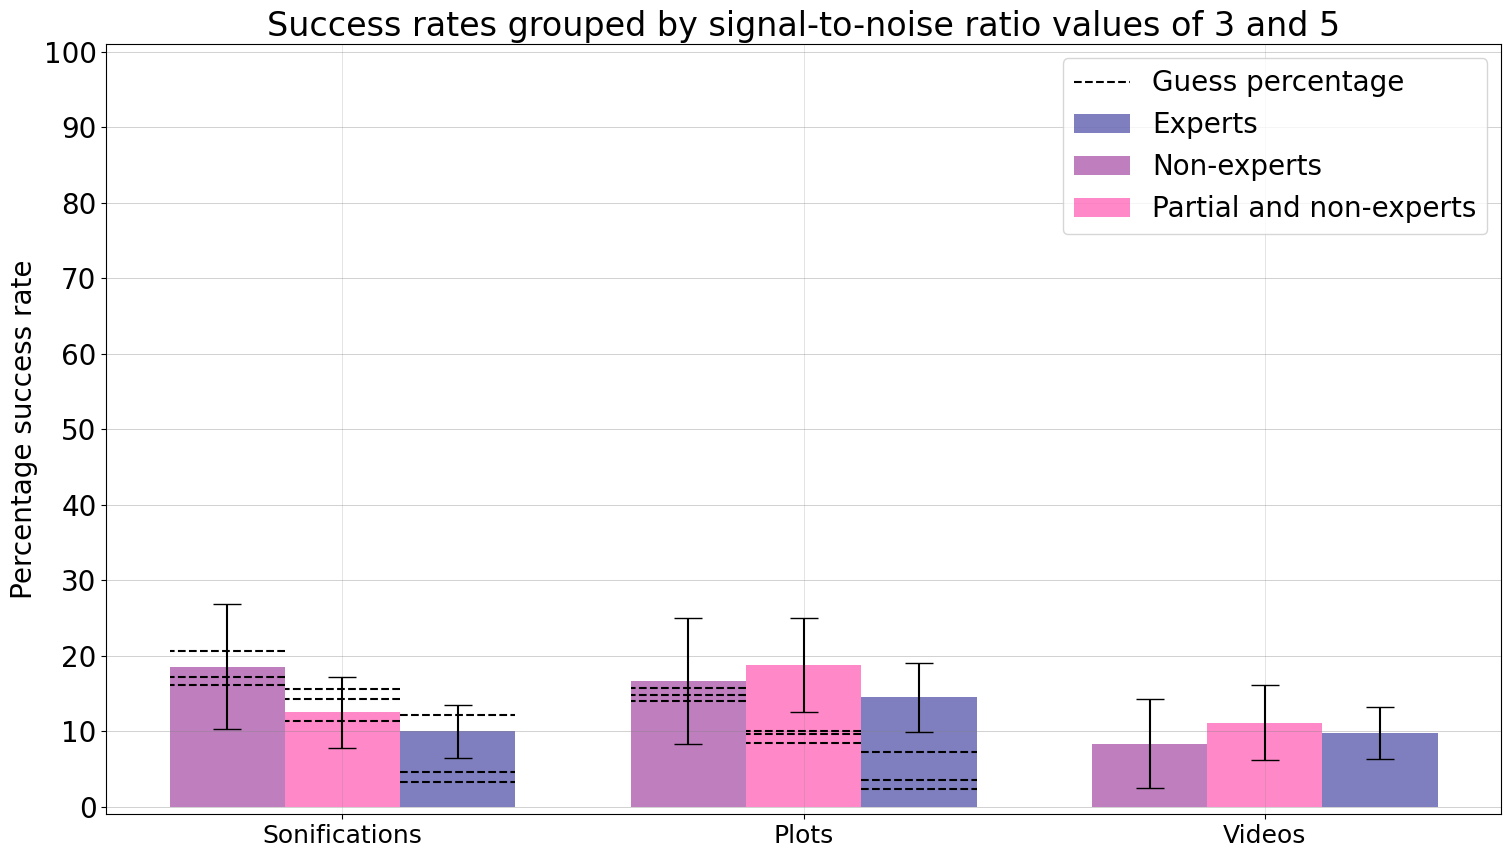

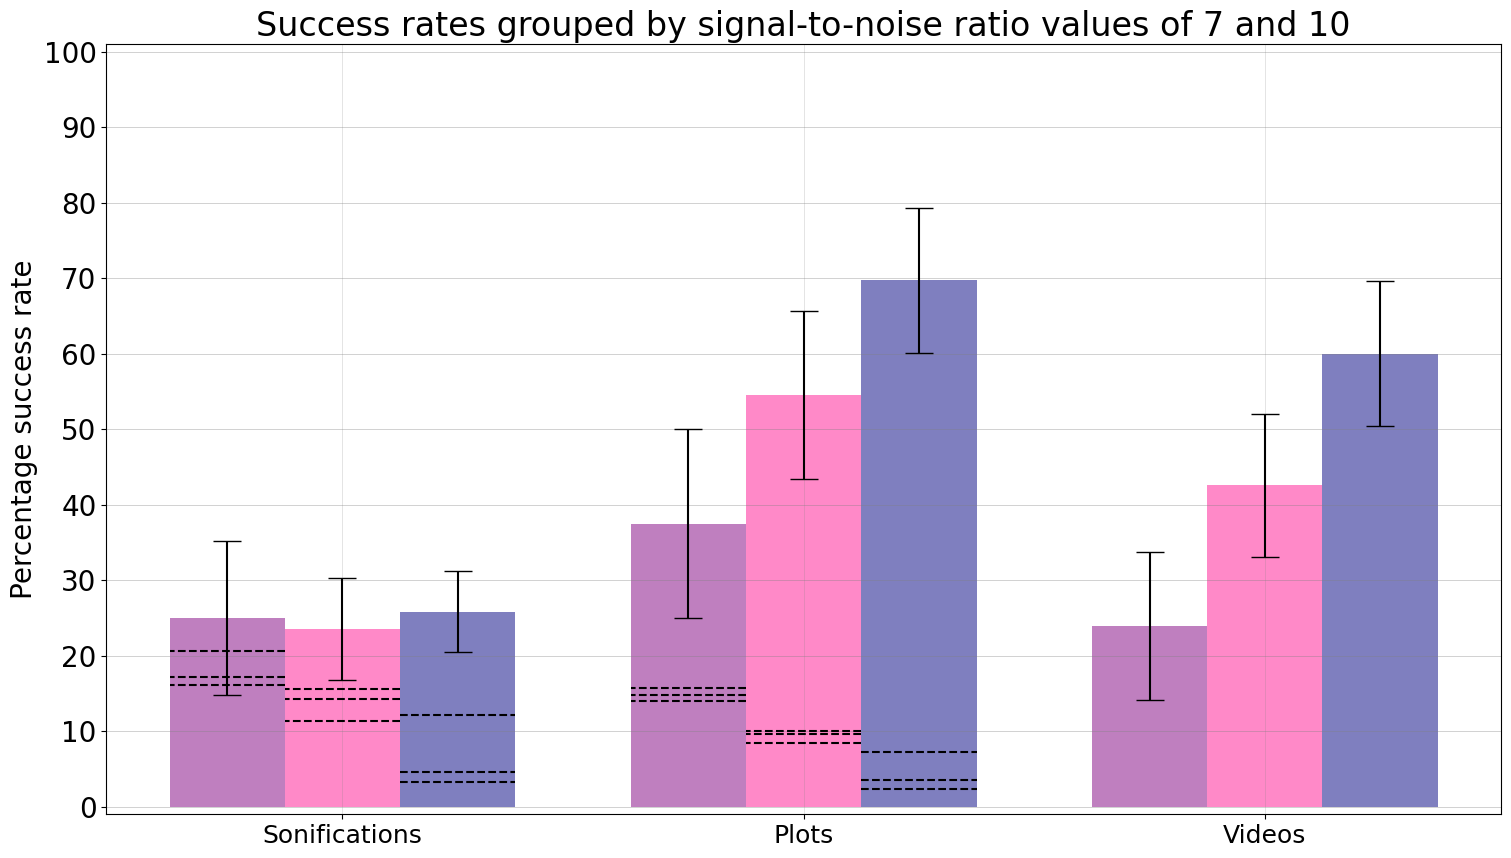

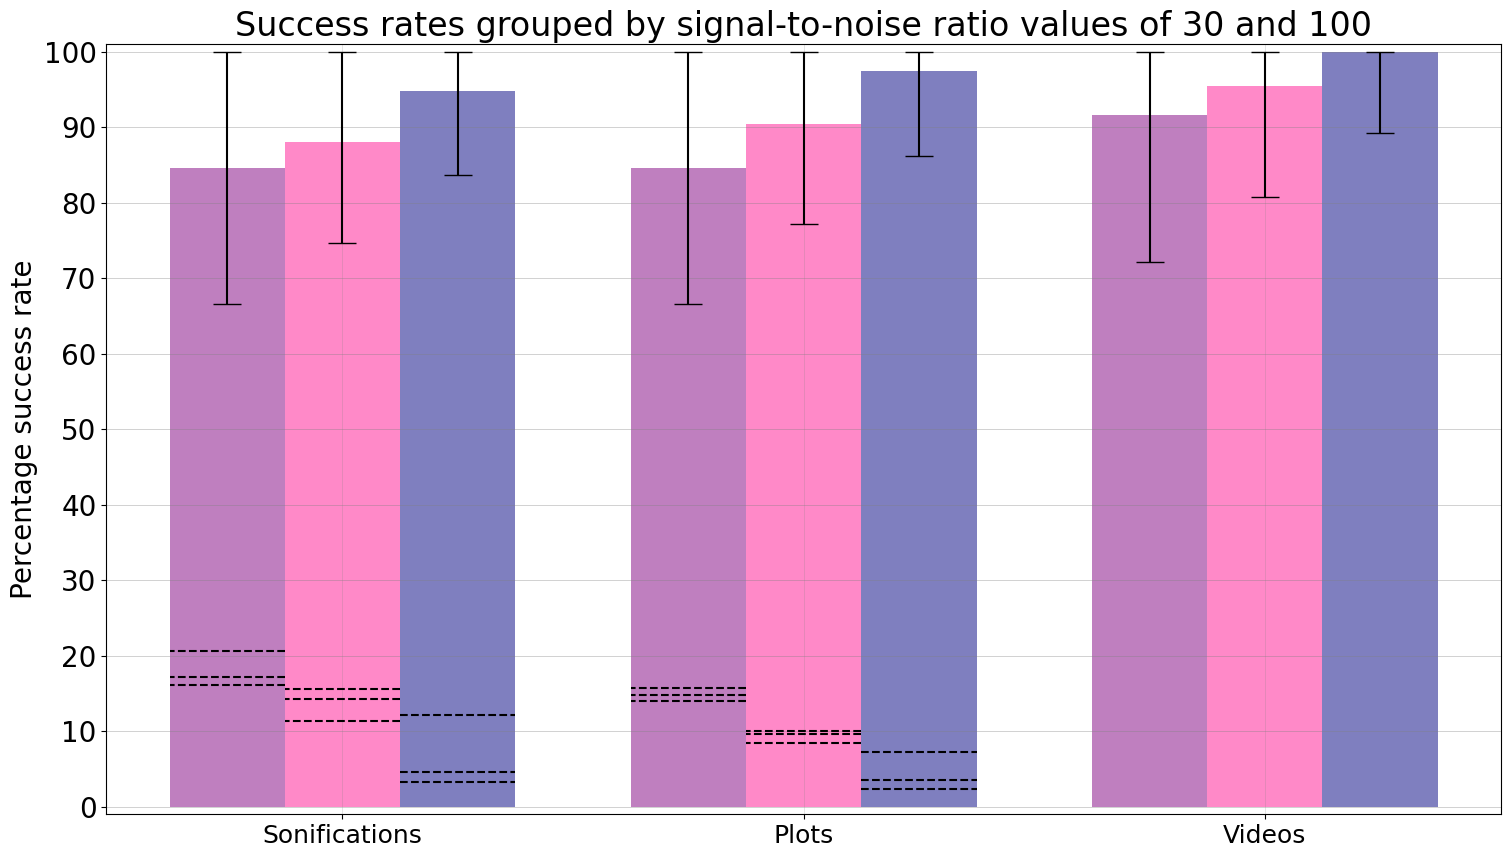

In [145]:
def produce_regime_figure(regime_arr):
    
    plt.rcParams.update({'font.size': 20})
    
    suc = [extract_regime(sets_expert,regime_arr)[0],extract_regime(sets_nexpert,regime_arr)[0],extract_regime(sets_pexpert,regime_arr)[0]]
    err = [extract_regime(sets_expert,regime_arr)[1],extract_regime(sets_nexpert,regime_arr)[1],extract_regime(sets_pexpert,regime_arr)[1]]
    
    f, ax = plt.subplots(111,figsize=(18,10))
    ax = plt.subplot(111)
    x_loc = [0,0.4,0.8]
    
    ax.bar([x + 0.1 for x in x_loc], suc[0], 
       yerr = error_out(suc[0],err[0]), width=0.1, 
       color='navy', align='center',alpha=0.5,capsize=10,label='Experts')
    
    expertguess = calc_12guess(expert_sound,expert_visual,expert_video)
    for i in range(0,len(expertguess)):
        if i == 1:
            ax.hlines(expertguess[i], x_loc[i]+0.05, x_loc[i]+0.15, linestyle = 'dashed',color= 'black',label='Guess percentage')
        else:
            ax.hlines(expertguess[i], x_loc[i]+0.05, x_loc[i]+0.15, linestyle = 'dashed',color= 'black')
    
    ax.bar([x - 0.1 for x in x_loc], suc[1], 
       yerr = error_out(suc[1],err[1]),width=0.1, 
       color='purple', align='center',alpha=0.5,capsize=10,label='Non-experts')
    
    nexpertguess = calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)
    for i in range(0,len(nexpertguess)):
        ax.hlines(nexpertguess[i], x_loc[i]-0.05, x_loc[i]-0.15, linestyle = 'dashed',color= 'black')
    
    ax.bar(x_loc, suc[2], 
       yerr = error_out(suc[2],err[2]),width=0.1, 
       color='deeppink', align='center',alpha=0.5,capsize=10,label='Partial and non-experts')
    
    pexpertguess = calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)
    for i in range(0,len(pexpertguess)):
        ax.hlines(pexpertguess[i], x_loc[i]+0.05, x_loc[i]-0.05, linestyle = 'dashed',color= 'black')
    
    ax.set_xlabel("",fontsize=20)
    ax.set_ylabel("Percentage of users",fontsize=20)
    

    #print(calc_12guess(expert_sound,expert_visual,expert_video))
    #print(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video))
    #print(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video))
    
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[1],1.5, 2.5, linestyle = 'dashed',color= 'black')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[2],2.5, 4, linestyle = 'dashed',color= 'black')
    
    plt.xticks(x_loc,fontsize=18)
    plt.ylim(-1,101)
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
    ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
    ax.set_ylabel("Percentage success rate")
    ax.set_title("Success rates grouped by signal-to-noise ratio values of "+str(regime_arr[0])+" and "+str(regime_arr[1]))
    x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
    x_locator = ticker.FixedLocator(x_loc)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    
    plt.rcParams.update({'font.size': 20})
    
    if regime_arr == [3,5]:
        ax.legend(loc='best')
    
    plt.savefig("New report/Produced figures/Success rates by regime - "+str(regime_arr)+".jpg")
    
    return ax
    
a = produce_regime_figure([3,5]) # Low-SNR
b = produce_regime_figure([7,10]) # Medium-SNR
c = produce_regime_figure([30,100]) # High-SNR

print(a,b,c)

### Two subgroups

<ipython-input-31-016f5a6fb710>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Correct n'], inplace=True)
<ipython-input-38-d1f389ada405>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77)


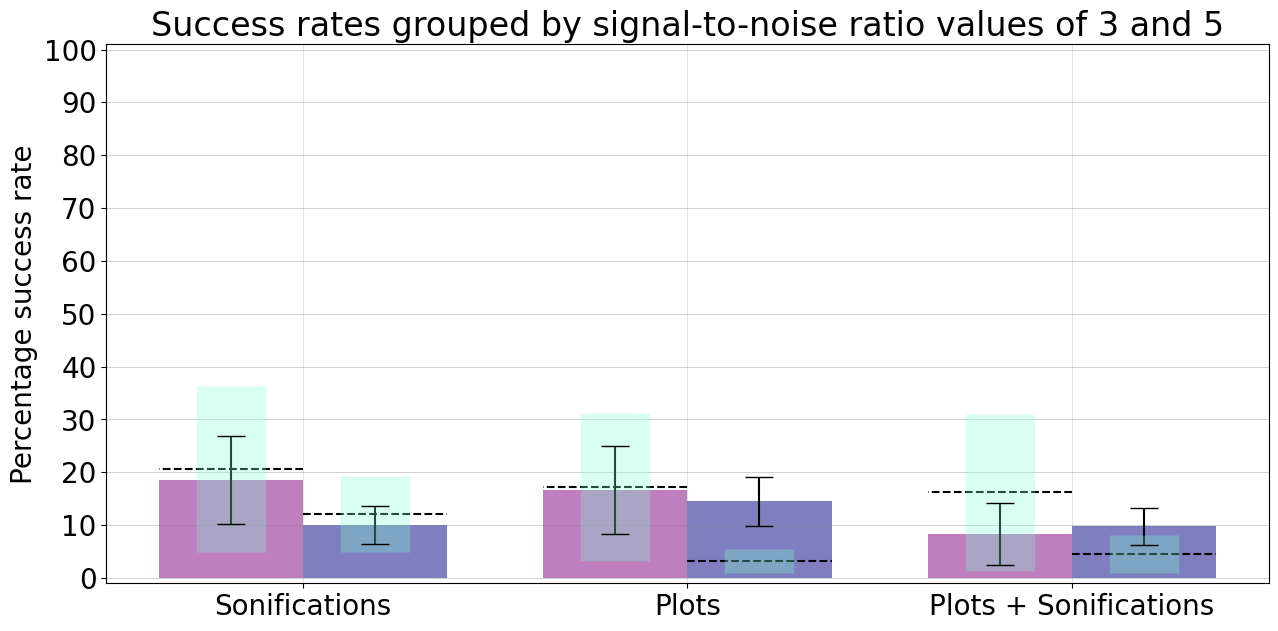

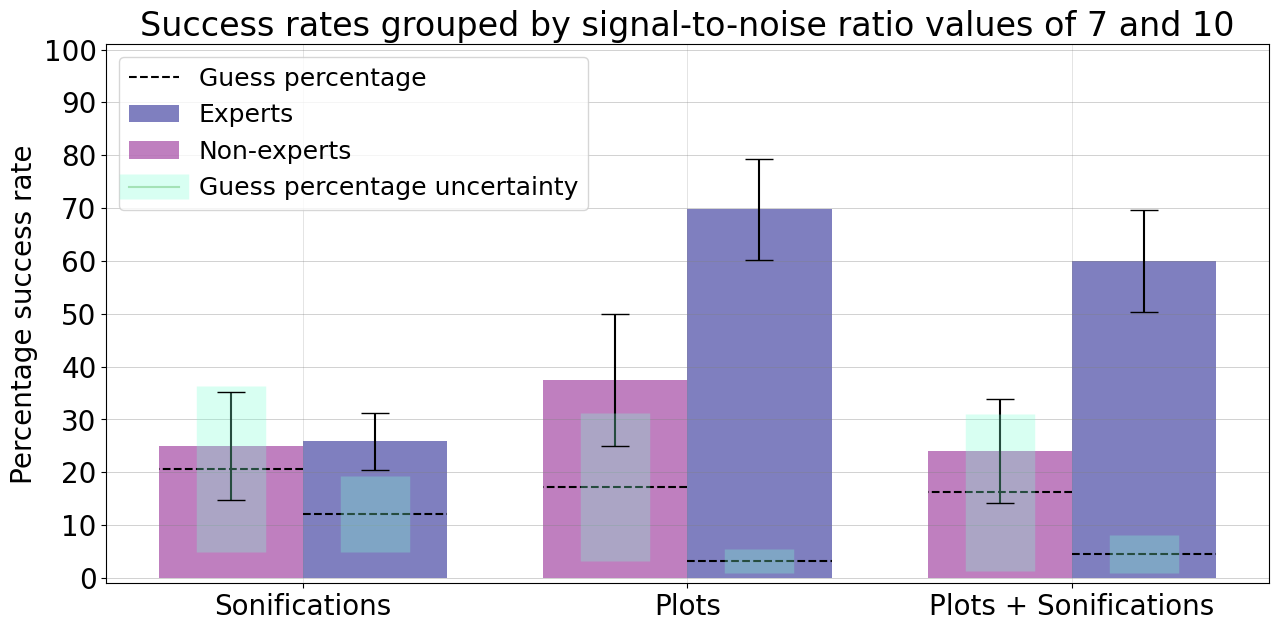

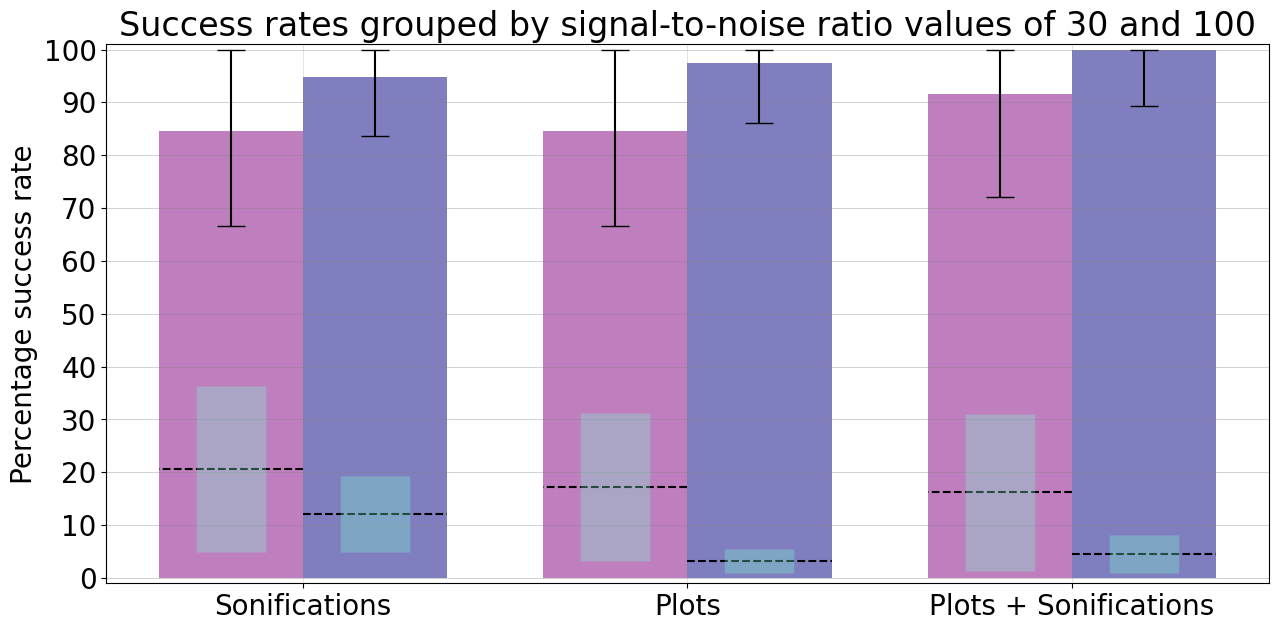

In [38]:
def produce_regime_figure2(regime_arr):
    
    plt.rcParams.update({'font.size': 20})
    
    suc = [extract_regime(sets_expert,regime_arr)[0],extract_regime(sets_nexpert,regime_arr)[0],extract_regime(sets_pexpert,regime_arr)[0]]
    err = [extract_regime(sets_expert,regime_arr)[1],extract_regime(sets_nexpert,regime_arr)[1],extract_regime(sets_pexpert,regime_arr)[1]]
    
    f, ax = plt.subplots(111,figsize=(15,7))
    ax = plt.subplot(111)
    x_loc = [0.1,0.5,0.9]
    
    ax.bar([x + 0.075 for x in x_loc], suc[0], 
       yerr = error_out(suc[0],err[0]), width=0.15, 
       color='navy', align='center',alpha=0.5,capsize=10,label='Experts')
    
    ax.bar([x - 0.075 for x in x_loc], suc[1], 
       yerr = error_out(suc[1],err[1]),width=0.15, 
       color='purple', align='center',alpha=0.5,capsize=10,label='Non-experts')
    
    expertguess = calc_12guess(expert_sound,expert_visual,expert_video)
    nexpertguess = calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)
    
    ax.hlines(expertguess[0][0], x_loc[0], x_loc[0]+0.15, linestyle = 'dashed',color= 'black',label='Guess percentage')
    ax.hlines(expertguess[0][1], x_loc[1], x_loc[1]+0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(expertguess[0][2], x_loc[2], x_loc[2]+0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(nexpertguess[0][0], x_loc[0], x_loc[0]-0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(nexpertguess[0][1], x_loc[1], x_loc[1]-0.15, linestyle = 'dashed',color= 'black')
    ax.hlines(nexpertguess[0][2], x_loc[2], x_loc[2]-0.15, linestyle = 'dashed',color= 'black')
    
    plt.errorbar(x_loc[0]+0.075,expertguess[0][0],yerr=[[expertguess[1][0]],[expertguess[1][0]]],ecolor='aquamarine',elinewidth=50,alpha=0.3,label='Guess percentage uncertainty')
    plt.errorbar(x_loc[1]+0.075,expertguess[0][1],yerr=[[expertguess[1][1]],[expertguess[1][1]]],ecolor='aquamarine',elinewidth=50,alpha=0.3)
    plt.errorbar(x_loc[2]+0.075,expertguess[0][2],yerr=[[expertguess[1][2]],[expertguess[1][2]]],ecolor='aquamarine',elinewidth=50,alpha=0.3)
    plt.errorbar(x_loc[0]-0.075,nexpertguess[0][0],yerr=[[nexpertguess[1][0]],[nexpertguess[1][0]]],ecolor='aquamarine',elinewidth=50,alpha=0.3)
    plt.errorbar(x_loc[1]-0.075,nexpertguess[0][1],yerr=[[nexpertguess[1][1]],[nexpertguess[1][1]]],ecolor='aquamarine',elinewidth=50,alpha=0.3)
    plt.errorbar(x_loc[2]-0.075,nexpertguess[0][2],yerr=[[nexpertguess[1][2]],[nexpertguess[1][2]]],ecolor='aquamarine',elinewidth=50,alpha=0.3)
    
    #print(expertguess)
    
    ax.set_xlabel("",fontsize=20)
    ax.set_ylabel("Percentage of users",fontsize=20)
    

    #print(calc_12guess(expert_sound,expert_visual,expert_video))
    #print(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video))
    #print(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video))
    
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[1],1.5, 2.5, linestyle = 'dashed',color= 'black')
    #ax.hlines(calc_12guess(sound_in,visual_in,video_in)[2],2.5, 4, linestyle = 'dashed',color= 'black')
    
    plt.xticks(x_loc,fontsize=20)
    plt.ylim(-1,101)
    y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
    y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
    ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
    ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
    ax.set_ylabel("Percentage success rate")
    ax.set_title("Success rates grouped by signal-to-noise ratio values of "+str(regime_arr[0])+" and "+str(regime_arr[1]))
    x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Plots + Sonifications"])
    x_locator = ticker.FixedLocator(x_loc)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.set_major_locator(y_locator)
    
    plt.rcParams.update({'font.size': 18})
    if regime_arr == [7,10]:
        ax.legend(loc='best')
    
    plt.savefig("New report/Produced figures/2Success rates by regime - "+str(regime_arr)+"new.jpg")
    
    return ax
    
a = produce_regime_figure2([3,5]) # Low-SNR
b = produce_regime_figure2([7,10]) # Medium-SNR
c = produce_regime_figure2([30,100]) # High-SNR

print(a,b,c)

# Response rate against time

Lastly, produce a figure showing the number of survey responses over time.

Opened Survey 1 (Responses)

Opened Survey 2 (Responses)

Opened Survey 3 (Responses)

Opened Survey 4 (Responses)

Opened Survey 5 (Responses)

Opened Survey 6 (Responses)

Finished timestamping


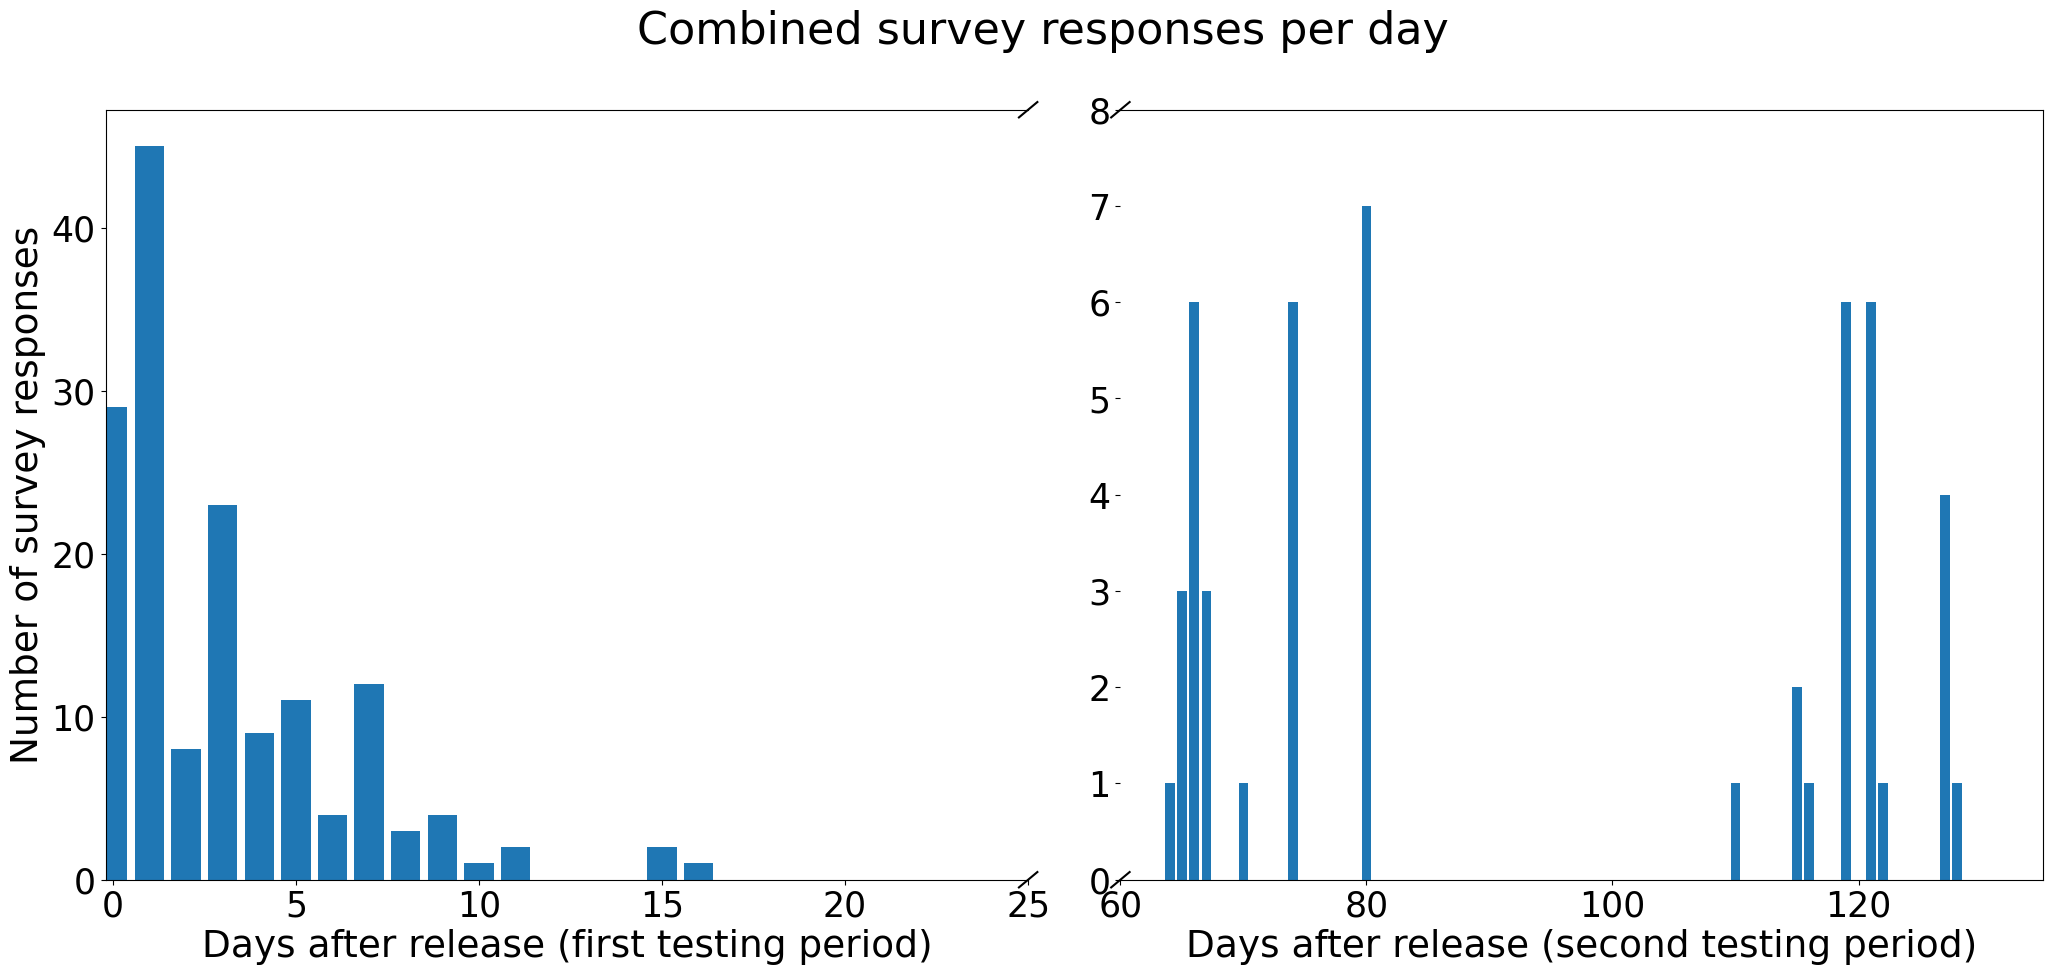

In [12]:
timestamps = pd.DataFrame({'Month' : [],
                           'Day' : [],
                           'Days since release': []})

def response(survey_sheet):
    
    plt.rcParams.update({'font.size': 25})
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    start = date(21,3,22)
    
    global timestamps
    
    print("Opened", survey_sheet)
    print("")
    
    timecol = worksheet.col_values(1,0)
    timecol.pop(0)
    
    for x in timecol:
        
        x = str(x[:-9])
        m = int(x[0])
        d = x[2:4]
        
        if d[-1] == '/':
            d = d[:-1]
        d = int(d)
        
        finish = date(21,m,d)
        delta = str(finish - start)
        
        if delta[0] == '0':
            d_re = 0
        else:
            d_re = delta[:-13]
        
        timestamps = timestamps.append({'Day' : int(d),
                                        'Month' : int(m),
                                        'Days since release': float(d_re)},
                                        ignore_index=True)
        
for x in names:
    response(x)
    
print("Finished timestamping")

def sort(df):
    df.sort_values(by=['Days since release'], inplace=True)
    
sort(timestamps)
freq_df = timestamps["Days since release"].value_counts()
day_list = freq_df.index.tolist()
freq_list = freq_df.tolist()

fig,(ax,ax2) = plt.subplots(1, 2, sharey=False,figsize=(25,10))

plt.rcParams.update({'font.size': 32})

ax.bar(day_list,freq_list)
ax2.bar(day_list,freq_list)
ax.set_xlim(-0.2,25) # most of the data
ax2.set_xlim(60,135)
ax2.set_ylim(0,8)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.subplots_adjust(wspace=0.1)
ax.set_xlabel('Days after release (first testing period)',fontsize=27)
ax2.set_xlabel('Days after release (second testing period)',fontsize=27)
ax.set_ylabel('Number of survey responses',fontsize=27)
fig.suptitle('Combined survey responses per day', fontsize=32)

d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
ax.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-left diagonal

kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal
ax2.plot((-d,d),(1-d,1+d), **kwargs) # bottom-right diagonal

plt.savefig("New report\Produced figures\Response rate prelim.jpg")

# Tabulating final results

Functions for extracting the raw numbers to each question

In [39]:
def produce_12_raw(sets):#,sound_in,visual_in,video_in):
    
    suc_12_sound = []
    suc_12_sounderr = []

    suc_12_visual = []
    suc_12_visualerr = []

    suc_12_video = []
    suc_12_videoerr = []

    snr = []

    for i in sets['Data']:

        j = i.iloc[6:18]
        
        def sort(df):
            df.sort_values(by=['SNR'], inplace=True)
            
        sort(j)

        for k in range(0,len(j['Name']),2):

            if len(snr) < 6:  
                snr.append(float(j.iloc[k]['SNR']))

            if "sonification" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_sound.append(correct/tot*100.0)
                suc_12_sounderr.append(err*100.0)

            elif "plot" in j.iloc[0]['Name']: 

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_visual.append(correct/tot*100.0)
                suc_12_visualerr.append(err*100.0)

            else:

                tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
                correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])

                err = np.sqrt(correct)/tot
                suc_12_video.append(correct/tot*100.0)
                suc_12_videoerr.append(err*100.0)
                
    return snr, suc_12_sound, suc_12_sounderr, suc_12_visual, suc_12_visualerr, suc_12_video, suc_12_videoerr

def produce_0_raw(sets):
    
    suc = []
    errsuc = []

    for i in sets['Data']:

        j = i.iloc[0:6]

        tot_n = 0
        tot_resp = 0

        for k in range(0,len(j['Name'])):
            n = j.iloc[k]['Number of correct answers']
            resp = j.iloc[k]['Total responses']

            #print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)

            #print(tot_n,tot_resp)

        suc.append(tot_n/tot_resp*100)
        errsuc.append(np.sqrt(tot_n)/tot_resp*100)
        
        return suc, errsuc

Put these in a dataframe

In [40]:
full_responses = []
full_correct = []

def tabulate_indiv(df):

    raw_responses = []

    raw_correct = []

    df = df.drop(['Name', '# of 0s','# of 1s','# of 2s','# of 3s','# of 4s','KS test result','Survey','σ'], axis=1)
    df['Correct n'] = pd.to_numeric(df['Correct n'], downcast="float")
    df['Number of correct answers'] = pd.to_numeric(df['Number of correct answers'], downcast="float")
    df['Total responses'] = pd.to_numeric(df['Total responses'], downcast="float")
    df['SNR'] = pd.to_numeric(df['SNR'], downcast="float")
    
    df = df.sort_values(by=['Correct n','SNR'],ascending=True)
    df = df.reset_index(drop=True)
    #display(df)
    
    for i in range(6,12):
        correct_12 = df.iloc[i]['Number of correct answers'] + df.iloc[6+i]['Number of correct answers']
        raw_correct.append(correct_12)
        
        total_12 = df.iloc[i]['Total responses'] + df.iloc[6+i]['Total responses']
        raw_responses.append(total_12)
    
    correct0 = df.iloc[0:6].sum()
    
    raw_correct.append(correct0[1])
    raw_responses.append(correct0[2])
    
    return raw_correct, raw_responses
    
for j in sets_expert['Data']:

    full_correct.append(tabulate_indiv(j)[0])
    full_responses.append(tabulate_indiv(j)[1])
    
for j in sets_pexpert['Data']:

    full_correct.append(tabulate_indiv(j)[0])
    full_responses.append(tabulate_indiv(j)[1])
        
for j in sets_nexpert['Data']:

    full_correct.append(tabulate_indiv(j)[0])
    full_responses.append(tabulate_indiv(j)[1])

Modified to add raw numbers

In [53]:
def tabulate(sets_expert,sets_pexpert,sets_nexpert):
    
    expert = produce_12_raw(sets_expert)
    pexpert = produce_12_raw(sets_pexpert)
    nexpert = produce_12_raw(sets_nexpert)
    expert_0 = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[0]
    err_expert_0 = successrates_n0(sets_expert,expert_sound,expert_visual,expert_video)[1]
    pexpert_0 = successrates_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[0]
    err_pexpert_0 = successrates_n0(sets_pexpert,pexpert_sound,pexpert_visual,pexpert_video)[1]
    nexpert_0 = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[0]
    err_nexpert_0 = successrates_n0(sets_nexpert,nexpert_sound,nexpert_visual,nexpert_video)[1]
    
    snr = produce_12_raw(sets_expert)[0]

    full_arr = []
    
    def form(i):
        
        new = str(int(np.round(i,0)))
        return new
    
    for i in range(0,len(snr)):
        
        data = [[[''],[''],[form(expert[1][i]) + ' ± ' + form(expert[2][i])],
                [''],[''],[form(expert[3][i]) + ' ± ' + form(expert[4][i])],
                [''],[''],[form(expert[5][i]) + ' ± ' + form(expert[6][i])]],
               [[''],[''],[form(pexpert[1][i]) + ' ± ' + form(pexpert[2][i])],
                [''],[''],[form(pexpert[3][i]) + ' ± ' + form(pexpert[4][i])],
                [''],[''],[form(pexpert[5][i]) + ' ± ' + form(pexpert[6][i])]],
               [[''],[''],[form(nexpert[1][i]) + ' ± ' + form(nexpert[2][i])],
                [''],[''],[form(nexpert[3][i]) + ' ± ' + form(nexpert[4][i])],
                [''],[''],[form(nexpert[5][i]) + ' ± ' + form(nexpert[6][i])]]]
        
        full_arr.append(data)
    
    groups = ['Experts', 'Partial and non-experts', 'Non-experts']
    groups_data = ['Sonifications','Plots','Plots + Sonifications']
    assoc = ['Total responses','Correct answers','Success rate %']
    Banks = snr
    Data = full_arr[0],full_arr[1],full_arr[2],full_arr[3],full_arr[4],full_arr[5]
    Data = np.array(Data).reshape(len(Banks),len(groups_data) * len(groups) * len(assoc))
    
    def sort(df):
        df.sort_values(by=['SNR'], inplace=True)

    midx = pd.MultiIndex.from_product([groups, groups_data, assoc])
    df = pd.DataFrame(Data, columns=midx).sort_index()#.astype(float)
    df.insert(0, "SNR", [10,100,3,30,5,7], True)
    sort(df)
    df = df.reset_index(drop=True)
    
    guesses_12 = ['Guess percentage','','',form(calc_12guess(expert_sound,expert_visual,expert_video)[0][0]) + ' ± ' + form(calc_12guess(expert_sound,expert_visual,expert_video)[1][0]),
                            '','',form(calc_12guess(expert_sound,expert_visual,expert_video)[0][1]) + ' ± ' + form(calc_12guess(expert_sound,expert_visual,expert_video)[1][1]),
                            '','',form(calc_12guess(expert_sound,expert_visual,expert_video)[0][2]) + ' ± ' + form(calc_12guess(expert_sound,expert_visual,expert_video)[1][2]),
                            '','',form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[0][0]) + ' ± ' + form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[1][0]),
                            '','',form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[0][1]) + ' ± ' + form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[1][1]),
                            '','',form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[0][2]) + ' ± ' + form(calc_12guess(pexpert_sound,pexpert_visual,pexpert_video)[1][2]),
                            '','',form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[0][0]) + ' ± ' + form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[1][0]),
                            '','',form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[0][1]) + ' ± ' + form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[1][1]),
                            '','',form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[0][2]) + ' ± ' + form(calc_12guess(nexpert_sound,nexpert_visual,nexpert_video)[1][2])]

    for i in range(0,6):
        df.loc[i,("Experts", "Sonifications","Total responses")] = full_responses[0][i]
        df.loc[i,("Experts", "Sonifications","Correct answers")] = full_correct[0][i]
        df.loc[i,("Experts", "Plots","Total responses")] = full_responses[1][i]
        df.loc[i,("Experts", "Plots","Correct answers")] = full_correct[1][i]
        df.loc[i,("Experts", "Plots + Sonifications","Total responses")] = full_responses[2][i]
        df.loc[i,("Experts", "Plots + Sonifications","Correct answers")] = full_correct[2][i]
        df.loc[i,("Partial and non-experts", "Sonifications","Total responses")] = full_responses[3][i]
        df.loc[i,("Partial and non-experts", "Sonifications","Correct answers")] = full_correct[3][i]
        df.loc[i,("Partial and non-experts", "Plots","Total responses")] = full_responses[4][i]
        df.loc[i,("Partial and non-experts", "Plots","Correct answers")] = full_correct[4][i]
        df.loc[i,("Partial and non-experts", "Plots + Sonifications","Total responses")] = full_responses[5][i]
        df.loc[i,("Partial and non-experts", "Plots + Sonifications","Correct answers")] = full_correct[5][i]
        df.loc[i,("Non-experts", "Sonifications","Total responses")] = full_responses[6][i]
        df.loc[i,("Non-experts", "Sonifications","Correct answers")] = full_correct[6][i]
        df.loc[i,("Non-experts", "Plots","Total responses")] = full_responses[7][i]
        df.loc[i,("Non-experts", "Plots","Correct answers")] = full_correct[7][i]
        df.loc[i,("Non-experts", "Plots + Sonifications","Total responses")] = full_responses[8][i]
        df.loc[i,("Non-experts", "Plots + Sonifications","Correct answers")] = full_correct[8][i]
    
    zero_data = ['Grouped zero transits',full_responses[0][6],full_correct[0][6],form(expert_0[0]) + ' ± ' + form(err_expert_0[0]),
                 full_responses[1][6],full_correct[1][6],form(expert_0[1]) + ' ± ' + form(err_expert_0[1]),
                 full_responses[2][6],full_correct[2][6],form(expert_0[2]) + ' ± ' + form(err_expert_0[2]),
                 full_responses[3][6],full_correct[3][6],form(pexpert_0[0]) + ' ± ' + form(err_pexpert_0[0]),
                 full_responses[4][6],full_correct[4][6],form(pexpert_0[1]) + ' ± ' + form(err_pexpert_0[1]),
                 full_responses[5][6],full_correct[5][6],form(pexpert_0[2]) + ' ± ' + form(err_pexpert_0[2]),
                 full_responses[6][6],full_correct[6][6],form(nexpert_0[0]) + ' ± ' + form(err_nexpert_0[0]),
                 full_responses[7][6],full_correct[7][6],form(nexpert_0[1]) + ' ± ' + form(err_nexpert_0[1]),
                 full_responses[8][6],full_correct[8][6],form(nexpert_0[2]) + ' ± ' + form(err_nexpert_0[2])]

    df.loc[len(df)] = guesses_12
    df.loc[len(df)] = zero_data
    
    target_row = 7

    idx = [target_row] + [i for i in range(len(df)) if i != target_row]
    df = df.iloc[idx]

    cor = [2,5,8,11,14,17,20,23,26]
    for i in range(0,len(df)):
    
        
        for j in cor:
    
            if df.iloc[i,j] == 0:

                df.iloc[i,j+1] = df.iloc[i,j+1].replace('0 ± 0',"0")
                
            else:
                
                continue
    
    dfi.export(df,'New report/Produced figures/full_table_12.jpg')

    #print(df.to_latex(index=False))

    return df

In [54]:
tabulate(sets_expert,sets_nexpert,sets_pexpert)

<ipython-input-39-753911d2a4d5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR         Experts                                 \
                           Sonifications                                  
                         Total responses Correct answers Success rate %   
7  Grouped zero transits             106              89         84 ± 9   
0                      3              36               4         11 ± 6   
1                      5              44               4          9 ± 5   
2                      7              40              10         25 ± 8   
3                     10              49              13         27 ± 7   
4                     30              44              40        91 ± 14   
5                    100              33              33       100 ± 17   
6       Guess percentage                                         12 ± 7   

                                                                        \
            Plots                                Plots + Sonifications   
  Total responses Correct answers Success rate %       Total responses   
7             102              98        96 ± 10                   130   
0              32               1          3 ± 3                    43   
1              37               9         24 ± 8                    39   
2              43              32        74 ± 13                    32   
3              33              21        64 ± 14                    33   
4              41              41       100 ± 16                    43   
5              36              34        94 ± 16                    44   
6                                          3 ± 2                         

                                 Partial and non-experts                  \
                                           Sonifications                   
  Correct answers Success rate %         Total responses Correct answers   
7             123         95 ± 9                      75              51   
0               0              0                      29               2   
1               8         21 ± 7                      27               5   
2              21        66 ± 14                      24               7   
3              18        55 ± 13                      27               5   
4              43       100 ± 15                      27              24   
5              44       100 ± 15                      23              20   
6                          5 ± 4                                           

                                                                 \
                           Plots                                  
  Success rate % Total responses Correct answers Success rate %   
7        59 ± 12              65              46        58 ± 13   
0        14 ± 10              26               1          8 ± 8   
1        23 ± 13              22               8        27 ± 16   
2        33 ± 17              22              14        50 ± 20   
3        17 ± 12              22              10        25 ± 14   
4        85 ± 26              24              22        92 ± 28   
5        85 ± 26              28              25        79 ± 24   
6        16 ± 10                                         11 ± 8   

                                                           Non-experts  \
  Plots + Sonifications                                  Sonifications   
        Total responses Correct answers Success rate % Total responses   
7                    72              52        58 ± 13              39   
0                    23               0              0              14   
1                    22               5        15 ± 11              13   
2                    24              13        33 ± 17              12   
3                    23               7        15 ± 11              12   
4                    22              20        83 ± 26              13   
5                    22              22       100 ± 29              13   
6                                              14 ± 10           

Split the full table into three for putting in the final manuscript

In [57]:
left = tabulate(sets_expert,sets_nexpert,sets_pexpert).iloc[0:,0:1]

tables = []

df_expert = tabulate(sets_expert,sets_nexpert,sets_pexpert).iloc[0:,1:10]
df_expert = pd.concat([left,df_expert],axis=1)
tables.append(df_expert)
display(df_expert)

df_pexpert = tabulate(sets_expert,sets_nexpert,sets_pexpert).iloc[0:,10:19]
df_pexpert = pd.concat([left,df_pexpert],axis=1)
tables.append(df_pexpert)
display(df_pexpert)

df_nexpert = tabulate(sets_expert,sets_nexpert,sets_pexpert).iloc[0:,19:28]
df_nexpert = pd.concat([left,df_nexpert],axis=1)
tables.append(df_nexpert)
display(df_nexpert)

arr = ["experts","partial_nonexperts","nonexperts"]

for i in range(0,len(tables)):
    f = open(arr[i]+".tex", "w")
    f.write(tables[i].to_latex(index=False))
    f.close()

#print(df_expert.to_latex(index=False))

<ipython-input-39-753911d2a4d5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR         Experts                                 \
                           Sonifications                                  
                         Total responses Correct answers Success rate %   
7  Grouped zero transits             106              89         84 ± 9   
0                      3              36               4         11 ± 6   
1                      5              44               4          9 ± 5   
2                      7              40              10         25 ± 8   
3                     10              49              13         27 ± 7   
4                     30              44              40        91 ± 14   
5                    100              33              33       100 ± 17   
6       Guess percentage                                         12 ± 7   

                                                                        \
            Plots                                Plots + Sonifications   
  Total responses Correct answers Success rate %       Total responses   
7             102              98        96 ± 10                   130   
0              32               1          3 ± 3                    43   
1              37               9         24 ± 8                    39   
2              43              32        74 ± 13                    32   
3              33              21        64 ± 14                    33   
4              41              41       100 ± 16                    43   
5              36              34        94 ± 16                    44   
6                                          3 ± 2                         

                                  
                                  
  Correct answers Success rate %  
7             123         95 ± 9  
0               0              0  
1               8         21 ± 7  
2              21        66 ± 14  
3              18        55 ± 13  
4              43       100 ± 15  
5              44       100 ± 15  
6                          5 ± 4

<ipython-input-39-753911d2a4d5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR Partial and non-experts                  \
                                   Sonifications                   
                                 Total responses Correct answers   
7  Grouped zero transits                      75              51   
0                      3                      29               2   
1                      5                      27               5   
2                      7                      24               7   
3                     10                      27               5   
4                     30                      27              24   
5                    100                      23              20   
6       Guess percentage                                           

                                                                 \
                           Plots                                  
  Success rate % Total responses Correct answers Success rate %   
7        59 ± 12              65              46        58 ± 13   
0        14 ± 10              26               1          8 ± 8   
1        23 ± 13              22               8        27 ± 16   
2        33 ± 17              22              14        50 ± 20   
3        17 ± 12              22              10        25 ± 14   
4        85 ± 26              24              22        92 ± 28   
5        85 ± 26              28              25        79 ± 24   
6        16 ± 10                                         11 ± 8   

                                                        
  Plots + Sonifications                                 
        Total responses Correct answers Success rate %  
7                    72              52        58 ± 13  
0                    23               0              0  
1                    22               5        15 ± 11  
2                    24              13        33 ± 17  
3                    23               7        15 ± 11  
4                    22              20        83 ± 26  
5                    22              22       100 ± 29  
6                                              14 ± 10

<ipython-input-39-753911d2a4d5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


SNR     Non-experts                                 \
                           Sonifications                                  
                         Total responses Correct answers Success rate %   
7  Grouped zero transits              39              23        68 ± 10   
0                      3              14               2          7 ± 5   
1                      5              13               3         19 ± 8   
2                      7              12               4        29 ± 11   
3                     10              12               2         19 ± 8   
4                     30              13              11        89 ± 18   
5                    100              13              11        87 ± 19   
6       Guess percentage                                        21 ± 16   

                                                                        \
            Plots                                Plots + Sonifications   
  Total responses Correct answers Success rate %       Total responses   
7              36              21        71 ± 10                    36   
0              13               1          4 ± 4                    11   
1              11               3        36 ± 13                    13   
2              12               6        64 ± 17                    12   
3              12               3        45 ± 14                    13   
4              12              11        92 ± 20                    12   
5              14              11        89 ± 18                    12   
6                                        17 ± 14                         

                                  
                                  
  Correct answers Success rate %  
7              21        72 ± 10  
0               0              0  
1               2        23 ± 10  
2               4        54 ± 15  
3               2        30 ± 12  
4              10        91 ± 20  
5              12       100 ± 21  
6                        16 ± 15